# Bristol-Myers Squibb Company (BMY)  
Last update: 5 Mar 2022  
annual report: 2021  
share price data from: 1/10/20211  

## Abstract
This notebook was developed to use as a template to analyze dividend paying companies as potential investments. This company was selected for analysis because it is on the Dividend Aristocrat list and passes the quick look tests.  

## Introduction
[Bristol-Myers Squibb](https://www.bms.com/investors.html) develops, licenses, manufactures, and markets biopharmaceutical products worldwide. The company offers products in hematology, oncology, cardiovascular, and immunology therapeutic classes.

Sector(s): Healthcare  
Industry: Drug Manufacturers—General  
Earnings Date: Feb 04, 2022      
Ex-Dividend Date: Jan 06, 2022

## Bottom line up front
Do not buy. DCF valuation scenario 1 is below current price. The company has taken on a lot of debt in recent acquisitions. Follow the link to the [Conclusion](#section11).

## Company description
[Bristol-Myers Squibb](https://en.wikipedia.org/wiki/Bristol_Myers_Squibb) is an American multinational pharmaceutical company, headquartered in New York City. BMS is one of the world's largest pharmaceutical companies, and is consistently ranked on the Fortune 500 list of the largest U.S. corporations.

BMS manufactures prescription pharmaceuticals and biologics in several therapeutic areas, including cancer, HIV/AIDS, cardiovascular disease, diabetes, hepatitis, rheumatoid arthritis, and psychiatric disorders.

BMS's primary R&D sites are located in Lawrence, New Jersey (formerly Squibb, near Princeton), Summit, New Jersey, formerly HQ of Celgene, New Brunswick, New Jersey, Redwood City, California, and Boudry in Switzerland, with other sites in Devens and Cambridge, Massachusetts, East Syracuse, New York, Braine-l'Alleud, Belgium, Tokyo, Japan, Bangalore, India, and Wirral, United Kingdom. BMS previously had an R&D site in Wallingford, Connecticut (formerly Bristol-Myers).

**Revision history:**  
- 1/10/2022: Copied from VZ notebook and reorganized 
- Feb 2022: updated quick look, reorganized flow of calculations, corrected usage of financial rates, organized end sections

## Analysis
The following sections of this notebook contain the financial analysis for the company.  

**Contents** <a id="section0"></a>  

1. [Stock screener results](#section1)
2. [Load financial spreadsheet](#section2)
3. [Discounted cash flow analysis, baseline](#section3)
4. [DCF Scenarios](#section4)
5. [NACI stock selection guide analysis](#section5)
6. [Future stock price](#section6)
7. [Dividend payout](#section7)
8. [Management performance](#section8)
9. [Conclusion](#section9)
10. [Notes](#section10)
11. [References](#section11)

In [1]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from dateutil.parser import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## 1) Stock screener results <a id="section1"></a>
This company was selected from the Fidelity stock screener results. The search results are based on Dividend yield (high and very high, 2.83% and higher), Volume 90 average (high and very high. 535k and higher) and Revenue Growth 5 years (0 or higher). 

**Current news**  
A review of the financial news sites from [yahoo](https://finance.yahoo.com/quote/BMY/?p=BMY) and [google](https://www.google.com/finance/quote/BMY:NYSE) showed the following:   

- February 09, 2022: Bristol Myers Squibb today announced that it has entered into accelerated share repurchase transactions under agreements with Morgan Stanley & Co. LLC, Barclays Bank PLC, Citibank, N.A. and JPMorgan Chase Bank, N.A., to repurchase, in aggregate, \\$5 billion of Bristol Myers Squibb common stock. Under the ASR Agreements, the ASR transactions will be completed under a previously announced \\$15 billion board-authorized...
- Feb 4 (Reuters): Drugmaker Bristol Myers Squibb Co (BMY) on Friday posted slightly better than expected fourth-quarter earnings on strong sales of blood thinner Eliquis and cancer drug Opdivo.
- 02/04/2022: Bristol Myers Squibb (BMY) offered better-than-expected sales guidance Friday, and BMY stock rose despite looming competition for two of its biggest cancer drugs. Bristol Myers Expects $10.5 Billion Shortfall This Year As Generics Loom. Revlimid and Abraxane are among Bristol's blockbuster drugs, and both are due to lose patent protection this year. Guidance for \\$47 billion in overall full-year sales for the company accounts for roughly \\$10.5 billion in lost revenue between the two drugs.

**Review quarterly results**  
Since this analysis mainly looks at the annual reports, a review of the quarterly reports and the most recent 12 months is needed to see if the recent quarterly trends match the yearly trends.
- [yahoo finance](https://finance.yahoo.com/quote/BMY/financials?p=BMY) shows TTM Total Revenue is about equal to the most current 10K revenue.
- The Compustat Company Research from Fidelity (from Sep. 29, 2021) shows: not examined, since final recommendation is do not buy.

**Average daily volume**  
Average daily volume: 12,779,274   

**Dividend yield**  
Forward dividend yield: 3.51%

## 2) Load financial spreadsheet <a id="section2"></a>
Data from consolidated financial statements and annual reports was collected and entered into a spreadsheet. All numerical data is converted from thousands or millions of dollars to dollars.  The stock share price history was obtained from yahoo and is included as a tab in the spreadsheet.  Other tabs in the spreadsheet are various worksheets. 

In [2]:
ticker = 'BMY' # company ticker symbol
os.chdir('/home/jim/Documents/Dividend Investing/DCF data/')

file_name = ticker+'_Financials.xlsx'
df_financials = pd.read_excel(file_name,sheet_name='DCF data')
df_NAIC_financials = pd.read_excel(file_name,sheet_name='NAIC data')
df_metrics = pd.read_excel(file_name,sheet_name='metrics')
df_price_history = pd.read_excel(file_name,sheet_name='Historical Prices')

# change the working director back to the Jupyter folder
os.chdir('/home/jim/Documents/JupyterLab/Discount Cash Flow Analysis/')

In [3]:
# convert dates from string to datetime format
price_date_list = []
for i in range(len(df_price_history)):
    price_date_list.append(datetime.strptime(str(df_price_history['Date'][i]), '%Y-%m-%d'))

df_price_history.insert(0, 'datetime', price_date_list)  # insert a new column with datetime data
df_price_history.sort_values(by=['datetime'], inplace=True) # sort data frame by datetime

df_price_history.set_index('datetime',inplace=True)

#df_price_history.head()

### 2.1) Format data frame <a id="section2-1"></a>
Generate a new data frame that holds the financial data needed for the DCF model.  Data from financial statements is copied into a spreadsheet which contains the data used in the analysis.  The data in the DCF_data tab is in a consistent format for ease of use by this notebook.  Standard names are used for the rows and columns.

In [4]:
#column names: fiscal years 
fy_data = df_financials.columns[1:].values.astype('datetime64[Y]')-1970
#line 0: Total revenue  
revenue_data = df_financials.iloc[0].to_numpy()[1:].astype('float')
#line 1: Cost of goods sold
Cost_of_goods_sold_data = df_financials.iloc[1].to_numpy()[1:].astype('float')
#line 2: General and administrative
General_and_administrative_data = df_financials.iloc[2].to_numpy()[1:].astype('float')
#line 3: Research and development
Research_and_development_data = df_financials.iloc[3].to_numpy()[1:].astype('float')
#line 4: Depreciation and amortization
Depreciation_and_amortization_data = df_financials.iloc[4].to_numpy()[1:].astype('float')
#line 5: Investment
Investment_data = df_financials.iloc[5].to_numpy()[1:].astype('float')
# line 6: Income before income taxes
Income_before_income_taxes_data = df_financials.iloc[6].to_numpy()[1:].astype('float')
# line 7: Income tax
Income_tax_data = df_financials.iloc[7].to_numpy()[1:].astype('float')
# line 8: Accounts receivable
Accounts_receivable_data = df_financials.iloc[8].to_numpy()[1:].astype('float')
# line 9: Inventories
Inventories_data = df_financials.iloc[9].to_numpy()[1:].astype('float')
# line 10: Accounts payable
Accounts_payable_data = df_financials.iloc[10].to_numpy()[1:].astype('float')
# line 11: Current assets
Current_assets_data = df_financials.iloc[11].to_numpy()[1:].astype('float')
# line 12: Current liabilities
Current_liabilities_data = df_financials.iloc[12].to_numpy()[1:].astype('float')
# line 13: Long term debt
Long_term_debt_data = df_financials.iloc[13].to_numpy()[1:].astype('float')
# line 14: Shares outstanding
Shares_outstanding_data = df_financials.iloc[14].to_numpy()[1:].astype('float')

In [5]:
# make a new data frame to store selected financial data
df_dcf_data = pd.DataFrame(data={
    'FY':fy_data[::-1],
    'revenue':revenue_data[::-1],
    'cost_of_goods_sold':Cost_of_goods_sold_data[::-1],
    'general_and_administrative':General_and_administrative_data[::-1],
    'research_and_development':Research_and_development_data[::-1],
    'depreciation':Depreciation_and_amortization_data[::-1],
    'investment':Investment_data[::-1],
    'income_before_income_taxes':Income_before_income_taxes_data[::-1],
    'income_tax':Income_tax_data[::-1],
    'accounts_receivable':Accounts_receivable_data[::-1],
    'inventories':Inventories_data[::-1],
    'accounts_payable':Accounts_payable_data[::-1], 
    'current_assets':Current_assets_data[::-1],
    'current_liabilities':Current_liabilities_data[::-1],
    'long_term_debt':Long_term_debt_data[::-1],
    'shares_outstanding':Shares_outstanding_data[::-1]
    })

#df_dcf_data

## 3) Discounted cash flow analysis, baseline <a id="section3"></a>
Discounted cash flow (DCF) is a valuation method used to estimate the value of an investment based on its expected future cash flows. DCF analysis attempts to figure out the value of an investment today, based on projections of how much money it will generate in the future. In finance, discounted cash flow (DCF) analysis is a method of valuing a security, project, company, or asset using the concepts of the time value of money. The DCF method used in this notebook follows [1].  

The value of any financial investment equals the present value of the expected future cash flows, discounted for risk and timing of these cash flows. The DCF method to value stocks is a four step process.  
1. Develop a set of future free cash flows for the corporation based on revenue growth, net operating profit margin, income tax rate and fix and working capital requirements.
2. Estimate the discount rate for the cash flows based on expected timing and risk.
3. Discount the cash flows and total them to calculate the value for the corporation as a whole.
4. Subtract the debt, preferred stock value and other claims and divide by the number of shares outstanding to get the intrinsic value.

Sections
- [Revenue growth rate](#section3-1) 
- [Net operating profit margin](#section3-2)
- [Tax rate](#section3-3)
- [Depreciation Rate](#section3-4)
- [Investment Rate](#section3-5)
- [Working Capital Rate](#section3-6)
- [Current Assets](#section3-7)
- [Current Liabilities](#section3-8)
- [Value of Debt Outstanding](#section3-9)
- [Current stock price](#section3-10)
- [Shares outstanding](#section3-11)
- [10 year treasury bond yield](#section3-12)
- [Bond yield spread to treasury](#section3-13)
- [Preferred stock yield](#section3-14)
- [Equity risk premium](#section3-15)
- [Company specific beta](#section3-16)
- [DCF model inputs](#section3-17)
- [Future cash flows](#section3-18)

### Revenue growth rate <a id="section3-1"></a>
The revenue growth rate (also sometimes called net sales) of the corporation plus any other revenues associated with the main operations of the business. It does not include dividends, interest income or non-operating income. Historic revenue data is obtained from consolidated income statements. The year over year change in revenue is calculated and converted to a percent, then an average revenue growth rate is calculated. 

**Adjustments**  
No adjustments for this company.

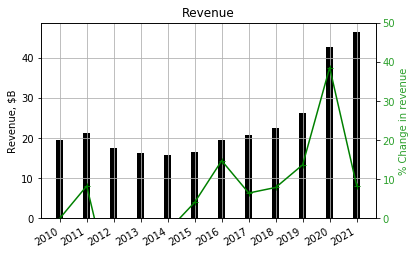

In [6]:
# calculate the percent change in revenue
pcr = np.zeros(len(df_dcf_data['revenue'].to_numpy())) # percent change in revenue
for i in range(len(df_dcf_data['revenue'].to_numpy()[0:-1])):
    pcr[i+1] = ((df_dcf_data['revenue'].to_numpy()[i+1] - df_dcf_data['revenue'].to_numpy()[i])/
                df_dcf_data['revenue'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Revenue, $B')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['revenue']/1e9, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcr,'+-g')
    
ax2.set_ylabel('% Change in revenue',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Revenue')
plt.show()

**Observation:**  
Since 2014, the revenues have been increasing every year. In 2020, revenues increased 63% as a result of the Celgene acquisition, which contributed \\$15.7 billion of revenues or 60% of the growth, and higher demand for Eliquis. Acquisitions of Celgene in 2019 and MyoKardia in 2020 contributed to the increase in revenue.

In [7]:
rgr_avg = pcr[-5:].mean()/100 # last five years
print('average revenue growth rate: {:.2f}%'.format(rgr_avg*100))

average revenue growth rate: 14.99%


### Net operating profit margin <a id="section3-2"></a>
Net Operating Profit should reflect the future revenue generating ability and expense requirements of the operating business that comprise the ongoing operations of the company.

$\text{NOPM} = \frac{\text{Revenue} - \text{Expenses}}{\text{Revenue}}$  
 
$\text{Expenses} = \text{Cost of Goods Sold (CGS)} + \text{General and Administrative (G&A)} + \text{Research and Development (R&D)}$

General and Administrative (G&A) is also called Sales, General and Administrative (SG&A)

**Adjustments**  
No adjustments for this company.

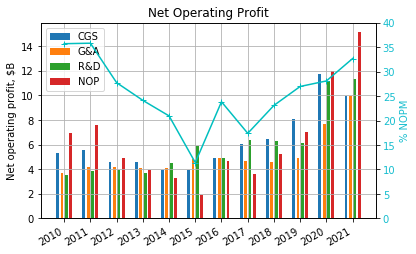

In [8]:
# NOP = (Revenue - Expenses)
nop = (df_dcf_data['revenue'].to_numpy() - \
    (df_dcf_data['cost_of_goods_sold'].to_numpy() + \
    df_dcf_data['general_and_administrative'].to_numpy() + \
    df_dcf_data['research_and_development'].to_numpy()) )

# net operating profit margin as percent of revenue
nopm = nop/df_dcf_data['revenue'].to_numpy()

# plot as four grouped bar chart with labels on right and working capital rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
x3_bar_position = []
x4_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=3))
    x2_bar_position.append(i-relativedelta(months=1))
    x3_bar_position.append(i+relativedelta(months=1))
    x4_bar_position.append(i+relativedelta(months=3))
    
width = 40  # the width of the bars
    
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Net operating profit, \\$B')

ax1.bar(x1_bar_position,df_dcf_data['cost_of_goods_sold'].to_numpy()/1e9, width,label='CGS')
ax1.bar(x2_bar_position,df_dcf_data['general_and_administrative'].to_numpy()/1e9, width,label='G&A')
ax1.bar(x3_bar_position,df_dcf_data['research_and_development'].to_numpy()/1e9, width,label='R&D')
ax1.bar(x4_bar_position,nop/1e9, width,label='NOP')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,4))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:cyan'

ax2.plot(df_dcf_data['FY'],nopm*100,'+-c')
    
ax2.set_ylabel('% NOPM',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,40))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Net Operating Profit')
plt.show()

**Observation**  
The NOP has been between 2 and 7 billion dollars during the past few years. The average net operating profit margin for the last 5 years is calculated below.  

In [9]:
#Average net operating profit margin
nopm_avg = nopm[-5:].mean()
print('average net operating profit margin: {:.2f}%'.format(nopm_avg*100))

average net operating profit margin: 25.64%


### Tax rate <a id="section3-3"></a>
Tax payments are taken from the consolidated income statement, provision for income taxes.  The effect of taxes on profits is accounted for. 

$\text{Tax rate} = \frac{\text{Income taxes}}{\text{Income before income taxes}}$

**Adjustments**  
No adjustments for this company.

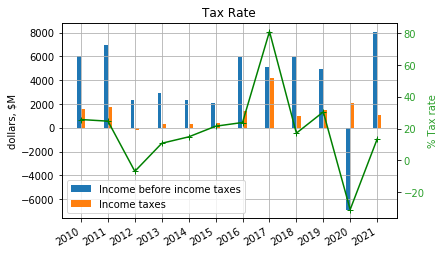

In [10]:
# plot as Grouped bar chart with labels on right and tax rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=1))
    x2_bar_position.append(i+relativedelta(months=1))

# calculate tax rate
tax_rate = df_dcf_data['income_tax']/df_dcf_data['income_before_income_taxes']

width = 50  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$M')

rects1 = ax1.bar(x1_bar_position,df_dcf_data['income_before_income_taxes']/1e6, width,
    label='Income before income taxes')
rects2 = ax1.bar(x2_bar_position,df_dcf_data['income_tax']/1e6, width,
    label='Income taxes')

ax1.tick_params(axis='y')
#ax1.set_ylim((-2e3,2e3))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],tax_rate * 100,'+-g')
    
ax2.set_ylabel('% Tax rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-40,100))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Tax Rate')
plt.show()

**Observation:**  
For most years the income tax paid has been a positive number, however income before income taxes was negative for 2020 primarily due to Amortization of acquired intangible assets of 9.688 billion dollars.

In [11]:
# Average tax rate
tax_rate_avg = tax_rate[-5:].mean()
print('average tax rate: {:.2f}%'.format(tax_rate_avg*100))

average tax rate: 22.21%


### Depreciation Rate <a id="section3-4"></a>
The depreciation rate is used to project the future net investment cash flows.  The effect is to reduce the amount of FCFF. Depreciation amounts are from the Consolidated Statement of Cash Flows, Depreciation and Amortization.  

$\text{Depreciation Rate}=\frac{\text{Depreciation and Amortization}}{\text{Revenues}}$

Depreciation is the write off or expensing of a percentage of the historical cost of an asset over the asset's useful life.  Property, plant and equipment (PP&E) are long term or non current assets owned or controlled by the company and used to manufacture and or sell the company's products.  The balance sheet typically shows all categories of PP&E grouped together, net of accumulated depreciation.  Depreciation represents wear and tear on an asset or the fact that an asset gets used up over time.  Companies record depreciation expense in the income statement every year for all depreciable assets in service or used by the company during the year.  The difference between GAAP and Tax Accounting methods is handled through deferred taxes.

Amortization is the write off or expensing of the cost of a financial instrument or an intangible asset over the shorter of its useful life or legal life.  Amortization is similar to depreciation and reflects the declining useful life and value of the intangible asset over time.  Companies in research and development intensive fields typically have many patents.  Such industries include high technology, pharmaceuticals and chemicals. 

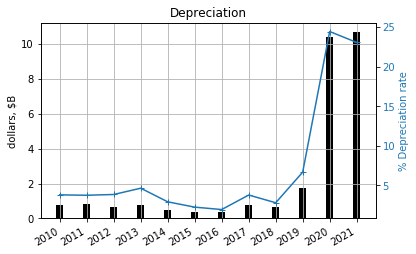

In [12]:
# depreciation rate
depreciation_rate = df_dcf_data['depreciation'] / df_dcf_data['revenue'].to_numpy()

# plot depreciation on left and rate on right
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

ax1.bar(df_dcf_data['FY'],df_dcf_data['depreciation']/1e9, width=100,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],depreciation_rate*100,'+-')
    
ax2.set_ylabel('% Depreciation rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((0,30))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Depreciation')
plt.show()

**Observation:**  
There was a large increase in depreciation following the acquisitions of Celgene in 2019 and MyoKardia in 2020. 

In [13]:
# average depreciation rate
depreciation_rate_avg = depreciation_rate[-5:].mean()
print('average depreciation rate: {:.2f}%'.format(depreciation_rate_avg*100))

average depreciation rate: 12.15%


### Investment Rate <a id="section3-5"></a>
Taken from Consolidated Statement of Cash Flows, Cash used for investing activities.  Net investment in the dollar amount needed to support the growth of the firm.  Included investments in properties, plant equipment in excess of the depreciation expenses associated with past investments.  Net investment decreases the amount of money available to the stockholders.  Investment in property, plant and equipment is necessary to both maintain service and sales and also to grow revenues and profits.  Investment amounts should include capital expenditures and research and development. 

$Ir=\frac {\text {Capital Expenditures}}{\text{Revenues}}$ 

For this company, the yearly investment amounts are taken from the Consolidated Statements of Cash Flows, 
Net Cash Used in Investing Activities.

**Adjustments**  
No adjustments for this comapany.

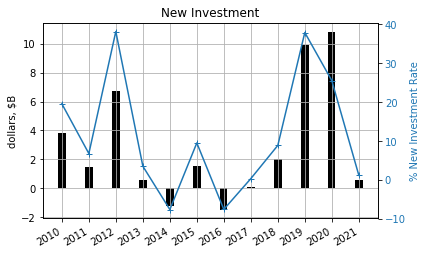

In [14]:
# investment rate
investment_rate = df_dcf_data['investment'] / df_dcf_data['revenue'].to_numpy()

# plot investment on left and rate on right
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$B')

ax1.bar(df_dcf_data['FY'],df_dcf_data['investment']/1e9, width=100,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],investment_rate*100,'+-')
    
ax2.set_ylabel('% New Investment Rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-10,40))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('New Investment')
plt.show()

**Observation:**  
In 2016 and 2014 a combination of sale and maturities of marketable debt securities and divestiture and other proceeds led to net inflow of cash used in investing activities. Acquisitions of Celgene in 2019 and MyoKardia in 2020 contributed to the increase in new investment.

In [15]:
# average investment rate
investment_rate_avg = investment_rate[-5:].mean()
print('average investment rate: {:.2f}%'.format(investment_rate_avg*100))

average investment rate: 14.76%


### Working Capital Rate <a id="section3-6"></a>
Working capital is needed to support the corporate sales effort of any company.  Often a company’s incremental change in net working capital either positive or negative is approximately proportional to its change in revenue.

$\text{Working capital} = \text{Accounts Receivable} + \text{Inventories} - \text{Accounts Payable}$  

Working capital is a company’s net investment in its accounts receivable and its inventories (cash outflows), minus its accounts payable (a cash inflow).  Working capital and taxes are cash outflows from the corporation that are not available to pay debts and stockholders.

**Adjustments**  
No adjustments for this company.

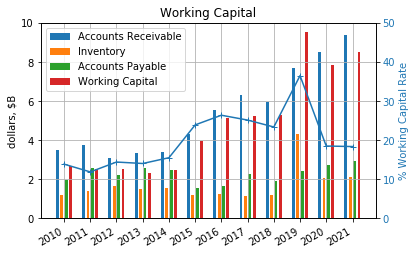

In [16]:
# plot as four grouped bar chart with labels on right and working capital rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
x3_bar_position = []
x4_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=3))
    x2_bar_position.append(i-relativedelta(months=1))
    x3_bar_position.append(i+relativedelta(months=1))
    x4_bar_position.append(i+relativedelta(months=3))

# calculate working capital rate
working_capital = (df_dcf_data['accounts_receivable'] + df_dcf_data['inventories']) - \
    df_dcf_data['accounts_payable']
working_capital_rate = working_capital / df_dcf_data['revenue']

width = 40  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$B')

rects1 = ax1.bar(x1_bar_position,df_dcf_data['accounts_receivable']/1e9, width,\
    label='Accounts Receivable')
rects2 = ax1.bar(x2_bar_position,df_dcf_data['inventories']/1e9, width, label='Inventory')

rects2 = ax1.bar(x3_bar_position,df_dcf_data['accounts_payable']/1e9, width, label='Accounts Payable')
rects2 = ax1.bar(x4_bar_position,working_capital/1e9, width, label='Working Capital')

ax1.tick_params(axis='y')
#ax1.set_ylim((-50,200))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],working_capital_rate * 100,'+-')
    
ax2.set_ylabel('% Working Capital Rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Working Capital')
plt.show()

**Observation:**  
Working capital spiked in 2020.  In 2021, it seemed to have returned to a historical level.

In [17]:
# average working capital rate
working_capital_rate_avg = working_capital_rate[-5:].mean()
print('average working capital rate: {:.2f}%'.format(working_capital_rate_avg*100))

average working capital rate: 24.36%


### Current assets <a id="section3-7"></a>
Total Current Assets from the most recent balance sheet statement of the company.  Current assets include inventory, cash and accounts receivables.

**Adjustments**  
None for this company.

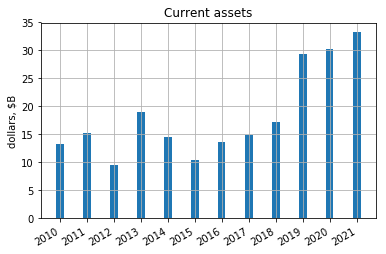

In [18]:
# plot Short Term Assets
width = 100  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

plt.bar(df_dcf_data['FY'],df_dcf_data['current_assets']/1e9, width)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Current assets')
plt.ylabel('dollars, \\$B')

plt.grid()
plt.show()

**Observation:**  
An increase in cash and cash equivalents for 2019 and 2020 is noted.

In [19]:
sta = df_dcf_data['current_assets'].iloc[-1]
print('Current assets: ${:.2f}B'.format(sta/1e9))

Current assets: $33.26B


### Current liabilities <a id="section3-8"></a>
Total Current Liabilities from the most recent balance sheet consolidated statement.

**Adjustments**  
None for this company.

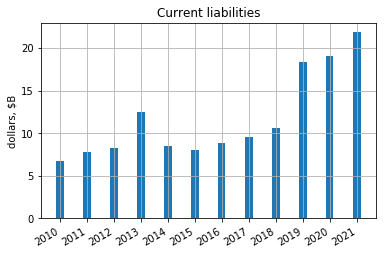

In [20]:
# plot Short Term Liabilities

width = 100  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

plt.bar(df_dcf_data['FY'],df_dcf_data['current_liabilities']/1e9, width)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Current liabilities')
plt.ylabel('dollars, \\$B')

plt.grid()
plt.show()

In [21]:
print('Average of current liabilities: ${:.2f}B'.format(df_dcf_data['current_liabilities'].mean()/1e9))

Average of current liabilities: $11.67B


**Observation**:  
Other current liabilities increased in 2019 and 2020.

In [22]:
stl = df_dcf_data['current_liabilities'].iloc[-1]
print('Current liabilities: ${:.2f}B'.format(stl/1e9))

Current liabilities: $21.87B


### Value of Debt Outstanding <a id="section3-9"></a>
Amount of debt outstanding from the most recent balance sheet of the company.


**Adjustments**  
None for this company.

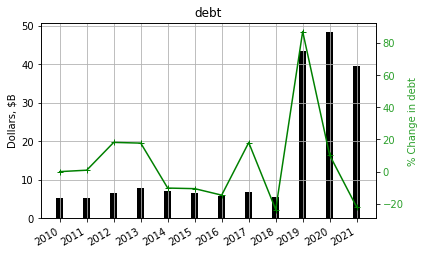

In [23]:
# calculate the percent change in debt, pcd
pcd = np.zeros(len(df_dcf_data['long_term_debt'].to_numpy())) # percent change in debt
for i in range(len(df_dcf_data['long_term_debt'].to_numpy()[0:-1])):
    pcd[i+1] = ((df_dcf_data['long_term_debt'].to_numpy()[i+1] - df_dcf_data['long_term_debt'].to_numpy()[i])/
                df_dcf_data['long_term_debt'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Dollars, $B')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['long_term_debt']/1e9, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcd,'+-g')
    
ax2.set_ylabel('% Change in debt',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-40,100))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('debt')
plt.show()

In [24]:
dgr_avg = pcr[1:].mean()/100
print('average debt growth rate: {:.2f}%'.format(dgr_avg*100))

average debt growth rate: 6.44%


**Observation:**  
Acquisitions of Celgene in 2019 and MyoKardia in 2020 contributed to the increase in debt.

In 2020, BMS issued an aggregate principal amount of \\$7.0 billion of fixed rate unsecured senior notes with proceeds net of discount and deferred loan issuance costs of \\$6.9 billion.

In 2019, BMS issued an aggregate principal amount of approximately \\$19.0 billion of floating rate and fixed rate unsecured senior notes with proceeds net of discount and deferred loan issuance costs of \\$18.8 billion.

In connection with the Celgene acquisition, BMS commenced offers to exchange outstanding notes issued by Celgene of approximately \\$19.9 billion for a like-amount of new notes to be issued by BMS (the “exchange offers”). This exchange transaction was accounted for as a modification of the assumed debt instruments.  Following the settlement of the exchange offers, BMS issued approximately \\$18.5 billion of new notes in exchange for the Celgene notes tendered in the exchange offers. The aggregate principal amount of Celgene notes that remained outstanding following the settlement of the exchange offers was approximately \\$1.3 billion.

The fair value of long-term debt was \\$58.5 billion and \\$50.7 billion at December 31, 2020 and 2019, respectively, valued using Level 2 inputs which are based upon the quoted market prices for the same or similar debt instruments. The fair value of short-term borrowings approximates the carrying value due to the short maturities of the debt instruments.

In [25]:
vod = df_dcf_data['long_term_debt'].iloc[-1]
print('Total long term debt and other: ${:.2f}B'.format(vod/1e9))

Total long term debt and other: $39.60B


### Current stock price <a id="section3-10"></a>
Most recent stock price for the [company](https://finance.yahoo.com/quote/BMY?p=BMY).  The current stock price is used to calculate the market value of the firm. Use the market value when looking at market capitalization for common stock. 

In [26]:
csp = 64.12 # current stock price
print('current stock price: ${:,.2f}'.format(csp))

current stock price: $64.12


### Shares outstanding <a id="section4-11"></a>
The number of shares outstanding is used to calculate the intrinsic stock value.  


In [27]:
so = df_dcf_data['shares_outstanding'].iloc[-1] # shares outstanding
print('shares outstanding, basic: {:,.0f}'.format(so))

shares outstanding, basic: 2,179,000,000


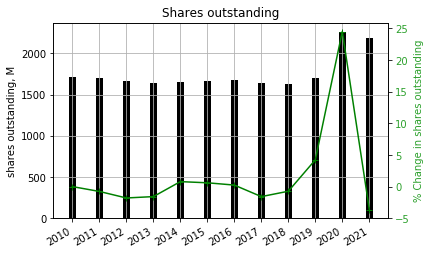

In [28]:
# calculate the percent change in shares outstanding, pcso
pcso = np.zeros(len(df_dcf_data['shares_outstanding'].to_numpy())) # percent change in debt
for i in range(len(df_dcf_data['shares_outstanding'].to_numpy()[0:-1])):
    pcso[i+1] = ((df_dcf_data['shares_outstanding'].to_numpy()[i+1] - df_dcf_data['shares_outstanding'].to_numpy()[i])/
                df_dcf_data['shares_outstanding'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('shares outstanding, M')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['shares_outstanding']/1e6, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcso,'+-g')
    
ax2.set_ylabel('% Change in shares outstanding',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Shares outstanding')
plt.show()

In [29]:
print('average shares outstanding growth rate: {:.2f}%'.format(pcso[1:].mean()))

average shares outstanding growth rate: 1.84%


**Observation:**  
On November 20, 2019, BMS completed the Celgene acquisition. Each share of Celgene common stock was converted into a right to receive one share of BMS common stock and \\$50.00 in cash. Celgene shareholders also received one tradeable contingent value right (“CVR”) for each share of Celgene common stock representing the right to receive \\$9.00 in cash, subject to the achievement of future regulatory milestones.

### 10 year treasury bond yield <a id="section3-12"></a>
The [10 year treasury yield](https://finance.yahoo.com/quote/%5ETNX?p=^TNX&.tsrc=fin-srch) is used as a measure of the risk free rate.   

In [30]:
tby = 1.38/100  # 10 year treasury bond yield
print('10 year treasury bond yield: {:,.2f}%'.format(tby*100))

10 year treasury bond yield: 1.38%


### Bond yield spread to treasury <a id="section3-13"></a>
The spread to treasury implies that all corporate debt will have a higher yield than yields associated with comparable maturity US Treasury Bonds.  The best way to determine default risk is to see how a particular company's debt is trading in the market and compare it on a spread basis with comparable maturity yields.  

Look at [PIMCO Active Bond Exchange-Traded Fund (BOND)](https://finance.yahoo.com/quote/BOND?p=BOND) or use a default rating systems that are published by the three major rating agencies, Standards and Poors Corp, Moody’s Investor Services and Fitch & Company.

Web resources:
- http://www.standardpoor.com/  
- http://bond.yahoo.com/rates.html  
- http://www.moodys.com/cust/default.asp  
- http://www.fitchibca.com/corporate/index.cfm  

In [31]:
bystt = (2.53-1.38)/100           # bond yield spread to treasury spread
print('Bond yield spread to treasury: {:,.2f}%'.format(bystt*100))

Bond yield spread to treasury: 1.15%


### Preferred stock yield <a id="section3-14"></a>
Amount of preferred stock outstanding from the most recent balance sheet of the company.

**Adjustments for Bristol-Myers Squibb**  

As of December 31, 2019, out of the 10,000,000 shares of authorized preferred stock, 1,300,188 shares have been designated as \\$2.00 convertible preferred stock (of which 3,568 shares have been issued and are outstanding).

Preferred stock, \\$2 convertible series, par value \\$1 per share: Authorized 10 million shares; issued and outstanding 3,484 in 2020 and 3,568 in 2019, liquidation value of \\$50 per share.


In [32]:
psy = 1/100  # preferred stock yield
print('preferred stock yield: {:,.2f}%'.format(psy*100))

vps = 3484*50 # value of preferred stock
print('value of preferred stock: {:,.2f}'.format(vps))

preferred stock yield: 1.00%
value of preferred stock: 174,200.00


### Equity risk premium <a id="section4-15"></a>
The expected excess return a hypothetical average investor would require of a diversified portfolio of stock (assumed beta = 1.0) over the yield on the 10-year Treasury Bond.  The equity risk premium has been going down over the years.  
- 1926 to 1990: 5.5%   
- 1962 to 1990: 3.25%   
- 1981 to 1990: 0.19%   

In times of sustained economic growth the risk premium demanded by investors generally declines.   

I'm going to use 3% as the equity risk premium.

In [33]:
eq_rp = 3.0/100             # equity risk premium
print('Equity risk premium: {:,.2f}%'.format(eq_rp*100))

Equity risk premium: 3.00%


### Company specific beta <a id="section3-16"></a>
The Beta used is Beta of Equity. Beta is the monthly price change of a particular company relative to the monthly price change of the S&P 500. The time period for Beta is 5 years when available. This value can be obtained at [yahoo finance](https://finance.yahoo.com/quote/BMY/?p=BMY).  

A measure of risk of an individual stock. It measures volatility of return - a higher beta means a higher risk. A financial model that uses Beta as its sole measure of risk (signal factor model) is called a Capital Asset Pricing Model (CAPM).
 

In [34]:
beta = 0.53 # company specific beta
print('Company specific beta: {:,.2f}'.format(beta))

Company specific beta: 0.53


### DCF model inputs <a id="section3-17"></a>
Below are the DCF model inputs.  These values were calculated above.

In [35]:
# various rates
rgr = rgr_avg              # revenue growth rate
print('revenue growth rate: {:,.2f}%'.format(rgr*100))
nopm = nopm_avg             # net operating profit margin
print('net operating profit margin: {:,.2f}%'.format(nopm*100))
tr = tax_rate_avg               # tax rate
print('tax rate: {:,.2f}%'.format(tr*100))
dr = depreciation_rate_avg              # depreciation rate (% of revenue)
print('depreciation rate: {:,.2f}%'.format(dr*100))
ir = investment_rate_avg              # investment rate (% of revenue)
print('investment rate: {:,.2f}%'.format(ir*100))
wcr = working_capital_rate_avg            # working capital rate (% of revenue)
print('working capital rate: {:,.2f}%'.format(wcr*100))

revenue growth rate: 14.99%
net operating profit margin: 25.64%
tax rate: 22.21%
depreciation rate: 12.15%
investment rate: 14.76%
working capital rate: 24.36%


**Excess return period**  
The excess return period is based on a judgment call.  The authors of [1] use the 1-5-7-10 rule. They group companies into one of four general categories and excess return periods. They use a 10 year excess return period to calculate what they would consider the maximum value. They use a more conservative 1 year, 5 year or 7 year return period to calculate a more reasonable or minimum value.  
- 1 year: Boring companies that operate in a highly competitive, low margin industry in which they have nothing particular going for them.
- 5 year: Decent companies that have a recognizable name and decent reputation and perhaps a regulatory benefit (utility company), but can’t control pricing or growth.
- 7 year: Good companies with good brand names, large companies of scale, good marketing channels and consumer identification (e.g. McDonald’s)
- 10 year: Great companies with great growth potential, tremendous marketing power, band names and in-place benefits (e.g. Intel, Microsoft, Coca Cola, Disney)  

The excess return period used for the base case is ten years, which should lead to a higher calculated intrinsic value.

In [36]:
# General Inputs
fy_start = df_dcf_data['FY'].iloc[-1].year # fiscal year to start excess return period
erp = 10 # excess return period, years
rev_start = df_dcf_data['revenue'].to_numpy()[-1] # starting revenues for excess return period
print('starting year: {:.0f}'.format(fy_start))
print('excess return period: {:.0f} years'.format(erp))
print('starting revenues: ${:,.2f}B'.format(rev_start/1e9))
print('shares outstanding: {:,.0f}'.format(so))

starting year: 2021
excess return period: 10 years
starting revenues: $46.38B
shares outstanding: 2,179,000,000


In [37]:
ps_mv = vps               # preferred stock, market value 
print('preferred stock, market value : ${:,.2f}B'.format(ps_mv/1e9))
cs_mv = csp*so            # common stock, market value 
print('common stock, market value: ${:,.2f}B'.format(cs_mv/1e9))

preferred stock, market value : $0.00B
common stock, market value: $139.72B


**Long Term Debt, Market Value, ltd_mv**  
Use the book value for long term debt.  Various online resources can be used to research this item.
These include, [Bondsonline](http://www.bondsonline.com/) and [Bloomberg](http://www.bloomberg.com/).  The book value of debt and preferred stock is an accounting measure that relates to how much money was raised by the company when each security was issued.  The market value of debt and the preferred and common stock is the price that specific obligations would trade at in today’s market. 

Long term debt for firms can take one of two forms.  It can be a long-term loan from a bank or other financial institution or it can be a long-term bond issued to financial markets, in which case the creditors are the investors in the bond.  Firms often have long term obligations that are not captured in the long term debt item.  These include obligations to lessors on assets that firms have leased, to employees in the form of pension fund and health care benefits yet to be paid, and to the government in the form of taxes deferred.  In the last two decades, accountants have increasingly moved towards quantifying these liabilities and showing them as long term liabilities.

In [38]:
ltd_mv = vod              # market value of long term debt
tmv = ltd_mv+ps_mv+cs_mv  # total market value 
print('total market value: ${:,.2f}B'.format(tmv/1e9))

total market value: $179.32B


**Cost of Common Equity, cce**  
The expected excess return a hypothetical average investor would require of a diversified portfolio of stock (assumed beta = 1.0) over the yield on the 10-year Treasury Bond.  The annual rate of return that an investor expects to earn when investing in shares of a company is known as the cost of common equity.  It includes dividends and increases in the market value.

In [39]:
cce = tby+beta*eq_rp      # cost of common equity or the expected return for the stock
print('cost of common equity: {:,.2f}%'.format(cce*100))

cost of common equity: 2.97%


**Long Term Debt, Average Yield, ltd_ay**  
The total cost of long term debt.

In [40]:
ltd_ay = tby+bystt        # long term debt average yield
print('long term debt average yield: {:,.2f}%'.format(ltd_ay*100))

long term debt average yield: 2.53%


**Long Term Debt, After Tax Yield, ltd_aty**  
The tax benefits of long term debt.  Interest payments are tax deductible for the company.

In [41]:
ltd_aty = ltd_ay*(1-tr)   # long term debt after tax yield
print('long term debt after tax yield: {:,.2f}%'.format(ltd_aty*100))

ltd_pc = vod/tmv          # weight for long term debt 
ltd_ate = ltd_aty*ltd_pc  # after tax effect of long term debt 
ps_ay = psy               # preferred stock, average yield 
ps_aty = ps_ay            # preferred stock, average yield 
print('preferred stock, average yield: {:,.2f}%'.format(ps_aty*100))

ps_pc = ps_mv/tmv         # preferred stock, % capital 
ps_ate = ps_aty*ps_pc     # preferred stock, after tax effect 
cs_ay = cce               # common stock, average yield 
cs_aty = cce              # common stock, after tax yield 
print('common stock, after tax yield: {:,.2f}%'.format(cs_aty*100))

cs_pc = cs_mv/tmv         # common stock, % capital 
cs_ate = cs_aty*cs_pc     # common stock, after tax effect 
print('common stock, after tax effet: {:,.2f}%'.format(cs_ate*100))

tate = ltd_ate+ps_ate+cs_ate # total after tax effect 
print('total after tax effect: {:,.2f}%'.format(tate*100))
tpc = ltd_pc+ps_pc+cs_pc     # total % Capital
print('total % Capital: {:,.2f}%'.format(tpc*100))

long term debt after tax yield: 1.97%
preferred stock, average yield: 1.00%
common stock, after tax yield: 2.97%
common stock, after tax effet: 2.31%
total after tax effect: 2.75%
total % Capital: 100.00%


**Weighted average cost of capital**  
A company's weighted average cost of capital (WACC) is the weighted average of the company's current cost of debt and equity calculated by using current debt, preferred stock and common stock market values.  The WACC of the company, calculated after tax, is the discount rate used in the DCF valuation procedures. The WACC, which is the cost of the different components of financing used by the firm, weighted by their market value proportions.  These include debt, preferred stock, and common stock.

WACC: Weighted Average Cost of Capital, the rate used to discount cash flows, based on the following three factors.
1. Base rate of return.
2. Expected return based on debt and preferred stock.
3. Expected return on common stock and Beta.

All adjusted for the tax advantage of interest payments and the percentage of debt, preferred stock and common stock.

In [42]:
wacc = tate
print('weighted average cost of capital: {:.1f}%'.format(wacc*100))

weighted average cost of capital: 2.7%


### Future cash flows <a id="section3-18"></a>
The future cash flows to the firm are projected based on revenue growth.  The cash flows are then discounted using the WACC and the ISV is calculated.

In [43]:
# make a list of the fiscal years in excess return period 
fy = np.zeros(erp+1)
fy[0] = fy_start
for i in range(1,erp+1): 
    fy[i]=fy_start+i

rev = np.zeros(len(fy))
ciwc = np.zeros(len(fy))
rev[0] = rev_start  #*rgr+rev_start   # find the future revenue using constant revenue growth rate 

for i in range(1,len(fy)): 
    rev[i] = rev[i-1]*rgr+rev[i-1]  # find the future revenue 
    ciwc[i] = (rev[i]-rev[i-1])*wcr  # find the change in working capital 

net_op = np.zeros(len(fy)) # net operating profit
adj_taxes = np.zeros(len(fy))
nopat = np.zeros(len(fy))
invest = np.zeros(len(fy))
depre = np.zeros(len(fy))
net_invest = np.zeros(len(fy))
fcff = np.zeros(len(fy))
disc_fact = np.zeros(len(fy))
disc_fcff = np.zeros(len(fy))                

# calculate values in table 
for i in range(1,len(fy)):
    net_op[i] = rev[i]*nopm # net operating profit margin
    adj_taxes[i] = net_op[i]*tr # net operating profit adjusted for taxes
    nopat[i] = net_op[i]-adj_taxes[i] # after tax net operating profit
    invest[i] = rev[i]*ir # future investments
    depre[i] = rev[i]*dr # future depreciations
    net_invest[i] = invest[i]-depre[i] # net investments
    fcff[i] = nopat[i]-net_invest[i]-ciwc[i] # free cash flow to the firm
    disc_fact[i] = 1/((1+wacc)**i) # discount factor
    disc_fcff[i] = disc_fact[i]*fcff[i] # discounted free cash flow to the firm
    
dcrv = nopat[-1]/wacc*disc_fact[-1] # discounted corporate residual value
derp_fcff = disc_fcff.sum() # discounted excess return period FCFF

tcv = derp_fcff+dcrv+sta # total corporate value
tvce = tcv-vod-vps-stl # total value of common equity
isv = tvce/so # intrinsic stock value

# print cash flows in a table
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('Year','Rev','NOP','AdjTaxes',
    'NOPAT','Invest.','Deprec.','dInvest.','dWC','FCFF','DF','DF*FCFF'))
for i in range(len(fy)):
    print('{:4.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.4f}{:10,.0f}'.format(fy[i],
        rev[i]/1e6,net_op[i]/1e6,adj_taxes[i]/1e6,nopat[i]/1e6,invest[i]/1e6,depre[i]/1e6,(invest[i]-depre[i])/1e6,ciwc[i]/1e6,
        fcff[i]/1e6,disc_fact[i],disc_fcff[i]/1e6))

Year       Rev       NOP  AdjTaxes     NOPAT   Invest.   Deprec.  dInvest.       dWC      FCFF        DF   DF*FCFF
2021    46,385         0         0         0         0         0         0         0         0    0.0000         0
2022    53,339    13,675     3,037    10,638     7,873     6,481     1,392     1,694     7,553    0.9732     7,351
2023    61,335    15,725     3,492    12,233     9,053     7,452     1,601     1,948     8,685    0.9472     8,226
2024    70,530    18,082     4,015    14,067    10,410     8,569     1,841     2,239     9,987    0.9219     9,207
2025    81,104    20,793     4,617    16,176    11,971     9,854     2,116     2,575    11,484    0.8972    10,304
2026    93,263    23,910     5,310    18,601    13,765    11,331     2,434     2,961    13,206    0.8732    11,531
2027   107,245    27,495     6,106    21,389    15,829    13,030     2,799     3,405    15,186    0.8498    12,905
2028   123,322    31,617     7,021    24,596    18,202    14,984     3,218     3

In [44]:
# Intrinsic Value
print('discounted excess return period FCFF: ${:,.2f}B'.format(derp_fcff/1e9))
print('discounted corporate residual value: ${:,.2f}B'.format(dcrv/1e9))
print('total corporate value: ${:,.2f}B'.format(tcv/1e9))
print('total value of common equity: ${:,.2f}B'.format(tvce/1e9))
tvce_baseline = tvce # save value as baseline case
isv_baseline = isv # save the isv for the baseline case
print('intrinsic stock value, baseline case: ${:,.2f}'.format(isv_baseline))
print('current stock price: ${:,.2f}'.format(csp))

discounted excess return period FCFF: $128.47B
discounted corporate residual value: $1,037.45B
total corporate value: $1,199.18B
total value of common equity: $1,137.70B
intrinsic stock value, baseline case: $522.12
current stock price: $64.12


**Observation:**  
The base line DCF analysis produces an intrinsic stock value of \\$492. This is not realistic since revenue growth rate is high based in part on recent acquisitions. Some adjustments will be made in the scenario 1 case. 

The calculations used here can be verified by using the [Valuepro](http://www.valuepro.net/index.shtml) web site, which calculates ISV based on the same method (not working as of 2/5/2022).

### List of all inputs to the DCF model
The following print statements format the inputs to the model similar to how they are presented on the Valuepro page.

In [45]:
print('{:>35s} {:<10.0f} {:>35s} {:,.3f}'.format('Excess return period, years:',erp,'Depreciation rate, %:',dr*100))
print('{:>35s} {:<10,.2f} {:>35s} {:,.3f}'.format('Starting revenues, $B:',
    rev_start/1e9,'Investment rate, %:',ir*100))
print('{:>35s} {:<10,.3f} {:>35s} {:,.3f}'.format('Revenue growth rate, %:',
    rgr*100,'Working capital rate, %:',wcr*100))
print('{:>35s} {:<10,.3f} {:>35s} {:,.3f}'.format('Net operating profit margin, %:',
    nopm*100,'Current assets, $B:',sta/1e9))
print('{:>35s} {:<10,.3f} {:>35s} {:.3f}'.format('Tax rate, %:',
    tr*100,'Current liabilities, $B:',stl/1e9))
print('{:>35s} {:<10,.2f} {:>35s} {:,.2f}'.format('Current stock price, $:',
    csp,'Equity risk premium, %:',eq_rp*100))
print('{:>35s} {:<10,.0f} {:>35s} {:,.2f}'.format('Shares outstanding, basic, M:',
    so/1e6,'Company specific beta:',beta))
print('{:>35s} {:<10,.2f} {:>35s} {:.3f}'.format('10 year treasury bond yield, %:',
    tby*100,'Total long term debt and other, $B:',vod/1e9))
print('{:>35s} {:<10,.2f} {:>35s} {:,.3f}'.format('Bond yield spread to treasury, %:',
    bystt*100,'Value of preferred stock, $B:',vps/1e9))
print('{:>35s} {:<10,.2f}'.format('Preferred stock yield, %:',psy*100))

       Excess return period, years: 10                       Depreciation rate, %: 12.150
             Starting revenues, $B: 46.38                      Investment rate, %: 14.760
            Revenue growth rate, %: 14.992                Working capital rate, %: 24.355
    Net operating profit margin, %: 25.638                     Current assets, $B: 33.262
                       Tax rate, %: 22.206                Current liabilities, $B: 21.868
            Current stock price, $: 64.12                  Equity risk premium, %: 3.00
      Shares outstanding, basic, M: 2,179                   Company specific beta: 0.53
    10 year treasury bond yield, %: 1.38       Total long term debt and other, $B: 39.605
  Bond yield spread to treasury, %: 1.15             Value of preferred stock, $B: 0.000
          Preferred stock yield, %: 1.00      


In [46]:
# weighted average cost of capital inputs
print('Weighted Average Cost of Capital')
print('Cost of common equity')
print('{:s}'.format('-'*37))
print('{:>32s} {:,.2f}'.format('10 year treasury bond yield, %:',tby*100))
print('{:>32s} {:,.2f}'.format('Company specific beta:',beta))
print('{:>32s} {:,.2f}'.format('Equity risk premium, %:',eq_rp*100))
print('{:s}'.format('-'*37))
print('{:>32s} {:,.2f}'.format('Cost of common equity, %:',cce*100))
print()

print('Market Capitalization and After-Tax Weighted Average Cost of Capital')
print()
print('{:s}{:^10s}{:^10s}{:^10s}{:^15s}{:^15s}'.format(' '*20,'Current','After-Tax','Market','%','Weighted After-'))
print('{:s}{:^10s}{:^10s}{:^10s}{:^15s}{:^15s}'.format(' '*20,'Yield','Yield','Value','Capitalization','Tax Yield'))

print('{:s}'.format('-'*80))
print('{:<15s}{:>12.2f}{:>10.2f}{:>10,.0f}{:>12.2f}{:>15.2f}'.format('Long term debt',
    ltd_ay*100,(tby+eq_rp)*(1-tr)*100,vod/1e9,ltd_pc*100,ltd_ate*100))
print('{:<15s}{:>12.2f}{:>10.2f}{:>10,.0f}{:>12.2f}{:>15.2f}'.format('Preferred stock',
     psy*100,ps_ate*100,vps/1e9,ps_pc*100,ps_ate*100))
print('{:<15s}{:>12.2f}{:>10.2f}{:>10,.0f}{:>12.2f}{:>15.2f}'.format('Common stock',
     cs_ay*100,cs_aty*100,cs_mv/1e9,cs_pc*100,cs_aty*100))
print('{:s}'.format('-'*80))
print('{:<37s}{:>10,.0f}{:>12.2f}{:>15.2f}'.format('',tmv/1e9,tpc*100,wacc*100))

Weighted Average Cost of Capital
Cost of common equity
-------------------------------------
 10 year treasury bond yield, %: 1.38
          Company specific beta: 0.53
         Equity risk premium, %: 3.00
-------------------------------------
       Cost of common equity, %: 2.97

Market Capitalization and After-Tax Weighted Average Cost of Capital

                     Current  After-Tax   Market         %       Weighted After-
                      Yield     Yield     Value   Capitalization    Tax Yield   
--------------------------------------------------------------------------------
Long term debt         2.53      3.41        40       22.09           0.43
Preferred stock        1.00      0.00         0        0.00           0.00
Common stock           2.97      2.97       140       77.91           2.97
--------------------------------------------------------------------------------
                                            179      100.00           2.75


## 4) DCF Scenarios <a id="section4"></a>
The following adjustments were made to various model parameters.
- excess return period was adjusted to a more conservative 5 years
- revenue growth rate was adjusted to 10% (base case = 14.99%)
- net operating profit margin was adjusted to 20% (base case = 25.64%)
- tax rate was adjusted to 20% (base case = 22.21%)
- depreciation rate was adjusted to 10% (base case = 12.15%)
- investment rate was adjust to 10% (base case = 14.76%)
- working capital rate was set to an even 20% (base case = 24.36%)
- weighted average cost of capital was adjusted to 8% to reflect higher interest rates (base case = 2.9%)

Adjusting the weighted average cost of capital to 8.0% to reflect possible higher interest and inflation in the future.

In [47]:
print('adjusted DCF input values and rates')
erp = 5
print('excess return period: {:,.0f} years'.format(erp))
rgr = 10/100
print('revenue growth rate: {:,.1f}%'.format(rgr*100))
nopm = 20/100
print('net operating profit margin: {:.2f}%'.format(nopm*100))
tr = 20/100
print('tax rate: {:.2f}%'.format(tr*100))
dr = 10/100
print('depreciation rate: {:,.2f}%'.format(dr*100))
ir = 10/100              # investment rate (% of revenue)
print('investment rate: {:,.2f}%'.format(ir*100))
wcr = 20/100
print('working capital rate: {:,.1f}%'.format(wcr*100))
wacc = 8/100 # weighted average cost of capital
print('weighted average cost of capital: {:.1f}%'.format(wacc*100))

adjusted DCF input values and rates
excess return period: 5 years
revenue growth rate: 10.0%
net operating profit margin: 20.00%
tax rate: 20.00%
depreciation rate: 10.00%
investment rate: 10.00%
working capital rate: 20.0%
weighted average cost of capital: 8.0%


In [48]:
# make a list of the fiscal years in excess return period 
fy = np.zeros(erp+1)
fy[0] = fy_start
for i in range(1,erp+1): 
    fy[i]=fy_start+i

rev = np.zeros(len(fy))
ciwc = np.zeros(len(fy))
rev[0] = rev_start  #*rgr+rev_start   # find the future revenue using constant revenue growth rate 

for i in range(1,len(fy)): 
    rev[i] = rev[i-1]*rgr+rev[i-1]  # find the future revenue 
    ciwc[i] = (rev[i]-rev[i-1])*wcr  # find the change in working capital 

net_op = np.zeros(len(fy))
adj_taxes = np.zeros(len(fy))
nopat = np.zeros(len(fy))
invest = np.zeros(len(fy))
depre = np.zeros(len(fy))
net_invest = np.zeros(len(fy))
fcff = np.zeros(len(fy))
disc_fact = np.zeros(len(fy))
disc_fcff = np.zeros(len(fy))                

# calculate values in table 
for i in range(1,len(fy)): 
    net_op[i] = rev[i]*nopm # net operating profit
    adj_taxes[i] = net_op[i]*tr # net operating profit adjusted for taxes
    nopat[i] = net_op[i]-adj_taxes[i] # after tax net operating profit
    invest[i] = rev[i]*ir # future investments
    depre[i] = rev[i]*dr # future depreciations
    net_invest[i] = invest[i]-depre[i] # net investments
    fcff[i] = nopat[i]-net_invest[i]-ciwc[i] # free cash flow to the firm
    disc_fact[i] = 1/((1+wacc)**i) # discount factor
    disc_fcff[i] = disc_fact[i]*fcff[i] # discounted free cash flow to the firm
    
dcrv = nopat[-1]/wacc*disc_fact[-1] # discounted corporate residual value
derp_fcff = disc_fcff.sum() # discounted excess return period FCFF

tcv = derp_fcff+dcrv+sta # total corporate value
tvce = tcv-vod-vps-stl # total value of common equity
isv = tvce/so # intrinsic stock value

# print cash flows in a table
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('Year','Rev','NOP','AdjTaxes',
    'NOPAT','Invest.','Deprec.','dInvest.','dWC','FCFF','DF','DF*FCFF'))
for i in range(len(fy)):
    print('{:4.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.4f}{:10,.0f}'.format(fy[i],
        rev[i]/1e6,net_op[i]/1e6,adj_taxes[i]/1e6,nopat[i]/1e6,invest[i]/1e6,depre[i]/1e6,(invest[i]-depre[i])/1e6,ciwc[i]/1e6,
        fcff[i]/1e6,disc_fact[i],disc_fcff[i]/1e6))

Year       Rev       NOP  AdjTaxes     NOPAT   Invest.   Deprec.  dInvest.       dWC      FCFF        DF   DF*FCFF
2021    46,385         0         0         0         0         0         0         0         0    0.0000         0
2022    51,024    10,205     2,041     8,164     5,102     5,102         0       928     7,236    0.9259     6,700
2023    56,126    11,225     2,245     8,980     5,613     5,613         0     1,020     7,960    0.8573     6,824
2024    61,738    12,348     2,470     9,878     6,174     6,174         0     1,123     8,756    0.7938     6,951
2025    67,912    13,582     2,716    10,866     6,791     6,791         0     1,235     9,631    0.7350     7,079
2026    74,704    14,941     2,988    11,953     7,470     7,470         0     1,358    10,594    0.6806     7,210


In [49]:
# Intrinsic Value
print('discounted excess return period FCFF: ${:,.2f}B'.format(derp_fcff/1e9))
print('discounted corporate residual value: ${:,.2f}B'.format(dcrv/1e9))
print('total corporate value: ${:,.2f}B'.format(tcv/1e9))
print('total value of common equity: ${:,.2f}B'.format(tvce/1e9))
tvce_S1 = tvce # save value as scenario 1
isv_S1 = isv # save the isv for scenario 1 case
print('intrinsic stock value, scenario 1 case: ${:,.2f}'.format(isv_S1))
print('current stock price: ${:,.2f}'.format(csp))

discounted excess return period FCFF: $34.76B
discounted corporate residual value: $101.68B
total corporate value: $169.71B
total value of common equity: $108.24B
intrinsic stock value, scenario 1 case: $49.67
current stock price: $64.12


The DCF model calculates with adjustments an intrinsic stock value of \\$49, which is less than the current stock price. Adjusting the WACC to 6% would make the ISV about equal to the current stock price. WACC of 8% is used to provide a margin of safety.

## 5) NACI stock selection guide analysis <a id="section5"></a>
This analysis follows the NAIC stock selection guide (SSG) [2].  The SSG relates revenue growth, EPS and share price history and makes a prediction about the future share price.    

The National Association of Investors Clubs (NAIC) is a nonprofit organization dedicated to educating individual investors and investment clubs to become successful lifelong investors.  NAIC's Stock Selection Guide (SSG) is used in the following cells to analyze the company's growth and whether the stock is selling at a reasonable price.

The SSG was originally developed in the 1950s as a paper worksheet by the not-for-profit National Association of Investors Corporation (NAIC). The SSG aims to aid individual investors in the fundamental analysis and selection of common stocks by reviewing components of a company's growth, quality, and value.

In [50]:
#column names: fiscal years 
years_list = df_NAIC_financials.columns[1:].values.astype('str')[::-1]

# convert years to datetime format
year_ended_list = []
for i in years_list:
    year_ended_list.append(datetime.strptime(i, '%Y'))

#line 0: revenue  
revenue = df_NAIC_financials.iloc[0].to_numpy()[1:].astype('float')[::-1]
#line 1: earnings per share
EPS = df_NAIC_financials.iloc[1].to_numpy()[1:].astype('float')[::-1]

### NAIC section 1: Visual analysis

**High and low price history for each year**  
From the daily price history obtained from yahoo finance, the high and low closing price for each is obtained and the data saved to the financial data frame as new columns.

In [51]:
fy_open = []
fy_close = []
fy_high = []
fy_low = []

for i in year_ended_list:
    start = i
    end = i + relativedelta(years=1)
    p1 = df_price_history.truncate(before=start, after=end)
    if len(p1) == 0:
        fy_open.append(np.nan)
        fy_close.append(np.nan)        
        fy_high.append(np.nan)
        fy_low.append(np.nan)
    else:
        fy_open.append(p1['Open'].iloc[0])
        fy_close.append(p1['Close'].iloc[-1])        
        fy_high.append(p1['Close'].max())
        fy_low.append(p1['Close'].min())

# convert from list to numpy array
fy_open = np.asarray(fy_open)
fy_close = np.asarray(fy_close)
fy_high = np.asarray(fy_high)
fy_low = np.asarray(fy_low)

**Plotting the data**  
The annual sales, EPS and the high and low share price is plotted on a semilog plot. A consistent percentage change in the data will plot on the semi-log chart as a straight line.

The stock price is plotted separately from the sales and earnings for clarity.


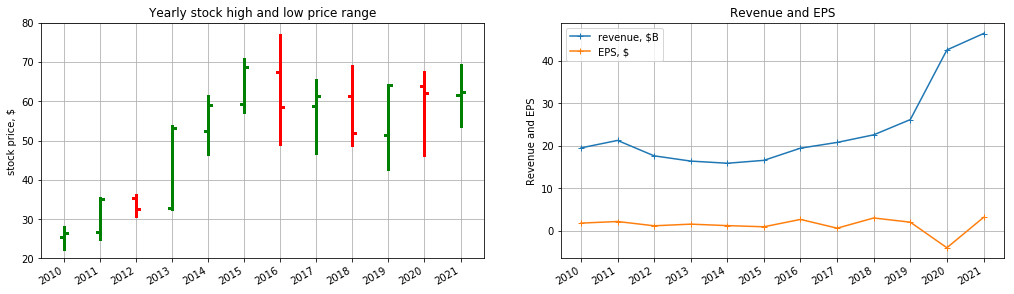

In [52]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

# figsize() function to adjust the size
plt.subplots(figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)
width = 3  # the width of the bars
#plt.bar(year_ended_list,fy_high-fy_low, width,bottom=fy_low,label='price')
j = 0
for i in year_ended_list:
    color = 'green'
    if fy_open[j] > fy_close[j]: color= 'red'
    # high/low lines
    plt.plot([i,i],[fy_low[j],fy_high[j]],color=color, linewidth=width)
    # open marker
    plt.plot([i,i-relativedelta(months=1)], [fy_open[j],fy_open[j]], color=color, linewidth=width)
    # close marker
    plt.plot([i,i+relativedelta(months=1)], [fy_close[j],fy_close[j]], color=color, linewidth=width)
    j += 1

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.ylim((20,80))
plt.title('Yearly stock high and low price range')
plt.ylabel('stock price, $')
#plt.legend()
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

plt.plot(year_ended_list,revenue/1e9,'+-',label='revenue, $B')
plt.plot(year_ended_list,EPS,'+-',label='EPS, $')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

#plt.yscale('log')
#plt.yticks([0.1,1,10,100,1000,10000],['0.1','1','10','100','1000','10000'])
#plt.ylim((0.1,1000))
plt.title('Revenue and EPS')
plt.ylabel('Revenue and EPS')
plt.legend()

plt.grid()

# space between the plots
plt.tight_layout(4)

# show plot
plt.show()

**Observation:**  
Share price has been trading in the 50 to 78 dollar range the last 7 years, indicating that the market is not impressed with the company. Average EPS (ignoring 2020) has been flat.  

The GAAP loss per share of \\$3.99 in 2020 as compared to the GAAP EPS of \\$2.01 in 2019 was primarily due to the IPRD charge resulting from the MyoKardia asset acquisition and charges relating to the Celgene acquisition including: 
1. amortization of acquired intangible assets
2. the unwinding of inventory fair value adjustments
3. tax charges resulting from an internal transfer of certain intangible assets and the Otezla* divestiture, partially offset by higher revenues and fair value adjustments to contingent value rights and equity investments

After adjusting for specified items, non-GAAP EPS increased \\$1.75 as result of the Celgene acquisition.

### NAIC section 3, Price earnings history
Section 3 of the SSG is the Price-Earnings history.  The following table is built from the high and low prices each year and the earnings per share. The high and low Price/Earnings ratios are calculated for each year and are listed in the columns labeled h-per and l-per.

In [53]:
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('year','high','low','eps',
    'h-per','l-per'))
for i in range(len(year_ended_list)):
    print('{:s}{:10,.2f}{:10,.2f}{:10,.2f}{:10,.2f}{:10,.2f}'.format(year_ended_list[i].strftime("%Y"),
        fy_high[i], fy_low[i],EPS[i],
        fy_high[i]/EPS[i],
        fy_low[i]/EPS[i]))

year      high       low       eps     h-per     l-per
2010     27.93     22.44      1.80     15.52     12.47
2011     35.29     24.97      2.18     16.19     11.45
2012     36.15     30.81      1.17     30.90     26.33
2013     53.84     32.71      1.56     34.51     20.97
2014     61.30     46.59      1.21     50.66     38.50
2015     70.71     57.30      0.94     75.22     60.96
2016     76.77     49.23      2.67     28.75     18.44
2017     65.35     46.82      0.61    107.13     76.75
2018     68.98     48.76      3.01     22.92     16.20
2019     64.19     42.77      2.02     31.78     21.17
2020     67.43     46.40     -3.99    -16.90    -11.63
2021     69.31     53.63      3.15     22.00     17.03


**Average high and P/E for select years**   
The average price to earning ratio based on high and low stock prices is calculated.

In [54]:
#Average high P/E for years 
pe_avg_high = (fy_high/EPS).mean()
print('average high P/E {:.2f}'.format(pe_avg_high))
#Average low P/E for years 
pe_avg_low = (fy_low/EPS).mean()
print('average low P/E {:.2f}'.format(pe_avg_low))

average high P/E 34.89
average low P/E 25.72


#### Estimate future EPS
A least squares fit is used to get the slope of the EPS data points.

In [55]:
# get linear fit for eps
y = EPS
x = np.arange(len(y))
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print('EPS slope: {:.2f}'.format(m))

lstsq_fit = m*x + c  # data points for each year

EPS slope: -0.10


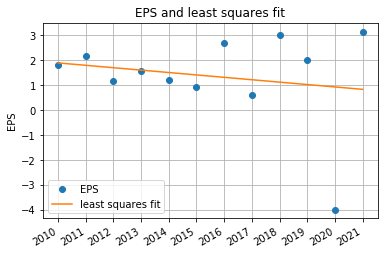

In [56]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('EPS')

ax1.plot(year_ended_list,EPS, 'o',label='EPS')
ax1.plot(year_ended_list,lstsq_fit, '-',label='least squares fit')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,4))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('EPS and least squares fit')
plt.show()

Using the equation for the best fit line, find the y value for the eps point at five years in the future.

In [57]:
# estimated eps in 5 years
eps_5yr_est = m*(x[-1]+5) + c
print('estimated eps in 5 years: {:.1f}'.format(eps_5yr_est))

estimated eps in 5 years: 0.3


Using the high and low price to earning ratio from above and the projected eps, calculate the range of stock price in five years.

In [58]:
naic_price_eps_low = eps_5yr_est*pe_avg_low
naic_price_eps_high = eps_5yr_est*pe_avg_high
print('estimated price range in 5 years: ${:.2f} to ${:.2f}'.format(naic_price_eps_low,naic_price_eps_high))

estimated price range in 5 years: $8.99 to $12.19


This is the estimated price range of the stock based on projected EPS and is a guide for what the stock price might be if conditions remain the same. Since the slope of the EPS history is negative, the projected stock price is negative. 

**Load financial data from metrics sheet**

In [59]:
#column names: fiscal years 
years_list = df_metrics.columns[1:].values.astype('str')[::-1]

# convert years to datetime format
year_ended_list = []
for i in years_list:
    year_ended_list.append(datetime.strptime(i, '%Y'))

In [60]:
#line 0: Total revenue
total_revenue = df_metrics.iloc[0].to_numpy()[1:].astype('float')[::-1]
#line 1: Net income
net_income = df_metrics.iloc[1].to_numpy()[1:].astype('float')[::-1]
# line 2: Shareholder equity
shareholder_equity =  df_metrics.iloc[2].to_numpy()[1:].astype('float')[::-1]
#line 3: Total liabilities
total_liabilities = df_metrics.iloc[3].to_numpy()[1:].astype('float')[::-1]
# line 4: Free cash flow, Net cash provided by operating activities 
free_cash_flow =  df_metrics.iloc[4].to_numpy()[1:].astype('float')[::-1]
# line 5: Dividends
dividends =  df_metrics.iloc[5].to_numpy()[1:].astype('float')[::-1]
#line 6: Total assets
total_assets = df_metrics.iloc[6].to_numpy()[1:].astype('float')[::-1]
#line 8: Dividends per share  
dps = df_metrics.iloc[8].to_numpy()[1:].astype('float')[::-1]
#line 9: Total tangible assets
total_tangible_assets = df_metrics.iloc[9].to_numpy()[1:].astype('float')[::-1]

#### NAIC section 3: 5 year estimated EPS, preferred method
See page 87 and figure 10-1, Need the following data:  
- estimate sales in 5 years based on sales growth
- NOPM
- Tax rate
- shares outstanding  

Net Operating Profit should reflect the future revenue generating ability and expense requirements of the operating business that comprise the ongoing operations of the company.

$\text{NOPM} = \frac{\text{Revenue} - \text{Expenses}}{\text{Revenue}}$  
 
Tax payments are taken from the consolidated income statement, provision for income taxes.  The effect of taxes on profits is accounted for. 

$\text{Tax rate} = \frac{\text{Income taxes}}{\text{Income before income taxes}}$

To get future EPS

$\text{future EPS} = \frac {\text{future revenue} \times  \text{NOPM} \times \text{(1-tax rate)}}{\text{number of shares}}$


**Revenue and least square fit**

In [61]:
# get linear fit for revenue
y = df_dcf_data['revenue']/1e6
x = np.arange(len(y))
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print('revenue slope: {:.2f}'.format(m))

lstsq_fit = m*x + c  # data points for each year

revenue slope: 2082.11


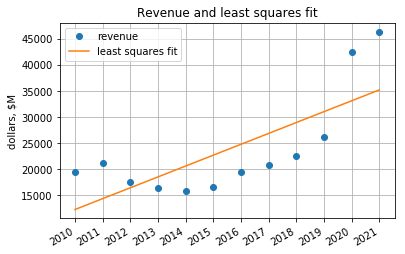

In [62]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $M')

ax1.plot(year_ended_list,df_dcf_data['revenue']/1e6, 'o',label='revenue')
ax1.plot(year_ended_list,lstsq_fit, '-',label='least squares fit')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,4))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Revenue and least squares fit')
plt.show()

Using the equation for the best fit line, find the y value for the EPS point at five years in the future.

In [63]:
# estimated revenue in 5 years
rev_5yr_est = m*(x[-1]+5) + c
print('estimated rev in 5 years: ${:,.1f}M'.format(rev_5yr_est))

estimated rev in 5 years: $45,610.9M


need to include estimate of number of shares outstanding in 5 years

In [64]:
print('starting revenues: ${:,.2f}'.format(rev_start/1e9))

starting revenues: $46.38


Using the adjusted NOPM and tax rate from scenario 1.  
adjusted DCF input values and rates  
- excess return period: 5 years
- revenue growth rate: 10.0%
- net operating profit margin: 20.00%
- tax rate: 20.00%
- depreciation rate: 10.00%
- investment rate: 10.00%
- working capital rate: 20.0%
- weighted average cost of capital: 8.0%

In [65]:
pm_nopm = 20/100
pm_tax_rate = 20/100

In [66]:
pm_eps_5yr_est = rev_5yr_est*pm_nopm*(1-pm_tax_rate)*1e6/df_dcf_data['shares_outstanding'].iloc[-1] 
#pm_eps_5yr_est = rev_5yr_est*nopm_avg*1e6/df_dcf_data['shares_outstanding'].iloc[-1] 
print('using preferred method: estimated eps in 5 years: ${:.2f}'.format(pm_eps_5yr_est))

using preferred method: estimated eps in 5 years: $3.35


Using the high and low price to earning ratio from above and the projected EPS, calculate the range of stock price in five years.

In [67]:
naic_price_pm_low = pm_eps_5yr_est*pe_avg_low
naic_price_pm_high = pm_eps_5yr_est*pe_avg_high
print('estimated price range in 5 years from preferred method: {:.2f} to {:.2f}'.format(naic_price_pm_low,naic_price_pm_high))

estimated price range in 5 years from preferred method: 86.14 to 116.85


**Observation:** 
Based on revenue growth, the projected stock price is a bit higher than the current price. However, based on price history, the stock is not expected to appreciate.

## 6) Future stock price <a id="section6"></a>
The projected future stock price is estimated from the results shown in this notebook based on DCF intrinsic stock value, the NAIC method or a combination of both. The DCF method does not consider market sentiment or popularity of the stock, whereas the NAIC method looks at the PE and EPS to develop the historical consensus that the market has put on the price of the stock. Both the NAIC and the DCF valuation should be considered. The DCF valuation is of the current ISV which is used as an indication of the future value, since it is assumed that the market price will converge eventually to the intrinsic value. 

The estimated future stock price considers the following:  
- base case ISV
- Senario ISV
- NAIC EPS growth
- NAIC preferred method

Using 5 year NAIC as a conservative estimate for the 10 year value and the analysis results, a judgment call is made concerning the price to put on the future value of the stock.  

In [68]:
print('estimated price range in 5 years from EPS: ${:.2f} to ${:.2f}'.format(naic_price_eps_low,naic_price_eps_high))
print('estimated price range in 5 years from preferred method: ${:.2f} to ${:.2f}'.format(naic_price_pm_low,naic_price_pm_high))

print('intrinsic stock value, baseline case: ${:,.2f}'.format(isv_baseline))
print('intrinsic stock value, scenario 1 case: ${:,.2f}'.format(isv_S1))

print('current stock price: ${:,.2f}'.format(csp))

estimated price range in 5 years from EPS: $8.99 to $12.19
estimated price range in 5 years from preferred method: $86.14 to $116.85
intrinsic stock value, baseline case: $522.12
intrinsic stock value, scenario 1 case: $49.67
current stock price: $64.12


The estimated price range in 5 years from the preferred method is \\$86.14 to \\$116.85. Taking the average and using that value on the IRR calculations.   

In [69]:
fsp = (86.14 + 116.85)/2 # final stock price, $
print('estimated future stock price: ${:,.2f}'.format(fsp))

estimated future stock price: $101.50


## 7) Dividend payout <a id="section7"></a>
The dividend payout examines the amount shareholders are getting from the company relative to earnings or revenue. It is an important metric to determine how the business is operating and whether it has enough growth potential.

### Dividend history

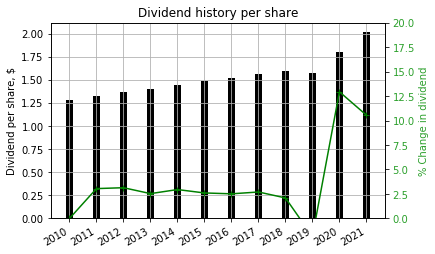

In [70]:
# calculate the percent change in dividends
pcd = np.zeros(len(dps)) # percent change in dividend
for i in range(len(dps[0:-1])):
    pcd[i+1] = ((dps[i+1] - dps[i])/
                dps[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Dividend per share, $')

# plot revenue as single bar
plt.bar(year_ended_list,dps, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(year_ended_list,pcd,'+-g')
    
ax2.set_ylabel('% Change in dividend',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,20))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Dividend history per share')
plt.show()

In [71]:
adgr = pcd[-6:].mean() #last 6 years
print('average dividend growth rate: {:.2f}%'.format(adgr))

average dividend growth rate: 4.83%


### Dividend yield
Dividend yield equals the annual dividend per share divided by the stock's price per share. The plot below shows the history of dividend yield over the evaluation period.

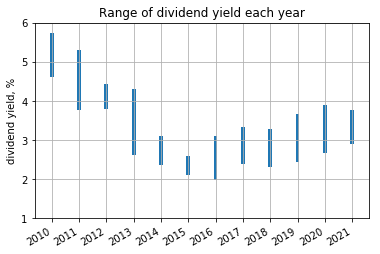

In [72]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

width = 50  # the width of the bars
plt.bar(year_ended_list,(dps/fy_high-dps/fy_low)*100, width,bottom=dps/fy_low*100,label='yield')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.ylim((1,6))
plt.title('Range of dividend yield each year')
plt.ylabel('dividend yield, %')
#plt.legend()
plt.grid()

# show plot
plt.show()

The dividend yield for the past five years has been in the 2.5 to 3.5 percent range.

### Dividend payout ratio
The dividend payout ratio is a relative measure of how much the company is paying to shareholders in dividends compared to other metrics such as revenue, earnings or cash flow. The dividend payout ratio is plotted as a ratio of dividends to net income, free cash flow (Net cash provided by operating activities) and NOP.  The payout ratio is useful for assessing a dividend's sustainability. Companies are extremely reluctant to cut dividends since it can drive the stock price down and reflect poorly on management's abilities.

**Payout ratio using net income**  
Payout ratio using net income plots the ratio of dividend payout divided by net income:  
$\frac {\text{Dividends}}{\text{Net income}}$  
Depending on how net income is listed in the financial statements, it may include large other charges.  

**Payout ratio using cash flow**  
Payout ratio using net cash flow plots the ratio of dividend payout divided by cash flow:  
$\frac {\text{Dividends}}{\text{cash flow}}$  
Cash flow from operating activities usually includes a long list of items. Some insight might be obtained from this ratio. The trend should be consistent. 

**Payout ratio using NOP**  
Payout ratio using NOP plots the ratio of dividend payout divided by NOP:  
$\frac {\text{Dividends}}{\text{NOP}}$  
NOP is calculated above and might be different from net income listed in the financial statements. This ratio should be the lowest numerically of the three plots. 

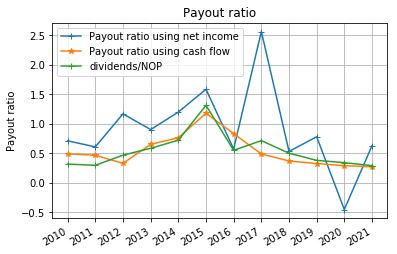

In [73]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Payout ratio')

ax1.plot(year_ended_list,dividends/net_income, '-+',label='Payout ratio using net income')
ax1.plot(year_ended_list,dividends/free_cash_flow, '-*',label='Payout ratio using cash flow')
ax1.plot(year_ended_list,dividends/nop, '-+',label='dividends/NOP')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,5))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Payout ratio')
plt.show()

In [74]:
# average the last three years
print('Dividends are paid at {:.1f}% of net income'.format((dividends/net_income)[-3:].mean()*100))
print('Dividends are paid at {:.1f}% of cash flow'.format((dividends/free_cash_flow)[-3:].mean()*100))
print('Dividends are paid at {:.1f}% of NOP'.format((dividends/nop)[-3:].mean()*100))

Dividends are paid at 31.9% of net income
Dividends are paid at 29.6% of cash flow
Dividends are paid at 33.7% of NOP


Payout ratio using net income: Net income includes large other charges and Amortization of acquired intangible assets.  Large swings in ratio for net income indicates various charges against net income.  
Payout ratio using cash flow: A ratio of greater than 1 for 2015. Currently below 33%.     
Payout ratio using NOP: Follows ratio based on cash flow.     
Dividend pay ratios for the last 3 years are near or below 50%.

### Internal Rate of Return (IRR) calculations
The internal rate of return (IRR) is the discount rate that makes the net present value (NPV) of all cash flows equal to zero in a discounted cash flow analysis. Generally speaking, the higher an internal rate of return, the more desirable an investment is to undertake.

As explained above, the stock price has not changed by much over the years, even though the revenue and dividends have been increasing. The final stock price is set equal to the current price.

Using the average dividend growth rate calculated above, a series of estimated future dividend payments are generated. 

In [75]:
#adgr = 1/100 # changing the dividend growth rate to 1%

fdp = np.zeros(len(dps)) # future dividend payments
fdp[0] = dps[-1]
for i in range(len(dps[0:-1])):
    fdp[i+1] = fdp[i]+fdp[i]*adgr/100

In [76]:
print('current stock price: ${:,.2f}'.format(csp))

#fsp = 100 #csp #500 #(csp + 102.05 + 138.82)/3 # final stock price, $
print('final stock price: ${:,.2f}'.format(fsp))

current stock price: $64.12
final stock price: $101.50


In [77]:
est_cf = np.copy(fdp) # make a copy of the estimated cash flow

# cash flows, initial purchase, dividend payments and final sale
est_cf[0] = est_cf[0] - csp # subtract purchase price from the first dividend payment
est_cf[-1] = est_cf[-1] + fsp # include the sale price with the final dividend payment

In [78]:
print('IRR: {:.2f}%'.format(np.irr(est_cf)*100))

IRR: 8.01%


According to global investment bank Goldman Sachs, 10-year stock market returns have averaged 9.2% over the past 140 years. and according to [10-Year Annualized Rolling Returns](https://static.fmgsuite.com/media/documents/bc618705-6161-4c00-be7f-c667c90c61b5.pdf), the long term average is about 10%. However there are many years where the rolling 10 year average return is below 4%.

The calculated IRR is 8%, which is a decent return and significantly higher than current interest rates.  

## 8) Management performance <a id="section8"></a>
The following analysis somewhat follows the Warren Buffett strategy as outlined in [3]. This strategy is essentially value investing where companies are chosen that meet a set of criteria and who's stock price is below the intrinsic value plus a margin of safety. These investments are usually held for the long term.  

- [Financial metrics](#section8-1)  
The following analysis looks at financial ratios over the evaluation period. Financial ratios can be used to judge management performance. Consistent favorable trends are an indication that management is taking care of the company.
 - Total liabilities to total assets ratio
 - Debt to equity and debt to NOP ratios
 - Financial ratios: RoE, RoA and PM
 - NAIC section 2: Evaluating management
 - Normalized data from consolidated statements
- [Market metrics](#section8-2)
 - One dollar premise
 - Share price vs EPS
 - Market capitalization
- [Qualitative metrics](#section8-3)
 - Simple and understandable business model
 - Favorable long term prospects
 - Commodity reliance
 - Consistent operating history
 - rationality:  
    1. focus on core aspects
    2. only invest in high ROE businesses
    3. focus on shareholder equity

### Financial metrics <a id="section8-1"></a>
The following financial metrics are examined over the evaluation period. We are looking for favorable trends and evidence of consistent operations. Some red flags will also be evident in the plots.

Red flags:  
- Shrinking gross profit margin
- Receivables growing faster than sales
- Rising debt-to-equity ratio
- Several years of revenue trending down
- Unsteady cash flow
- Rising accounts receivable or inventory in relation to sales
- Rising outstanding share count
- Consistently higher liabilities than assets
- Decreasing gross profit margin
- Increasing revenue while cash flow remains the same
- Unusual changes in key financial ratios


#### Total liabilities to total assets ratio
The ratio of liabilities to assets is plotted over the evaluation period.  For most companies examined the liabilities are the total liabilities and the ratio is calculated using total assets and total tangible assets.  Total tangible assets have goodwill and intangibles removed from the total. The ratio gives an indication of how much the company is worth versus how much the company owes. Ideally the ratio of liabilities to assets should be less than one.

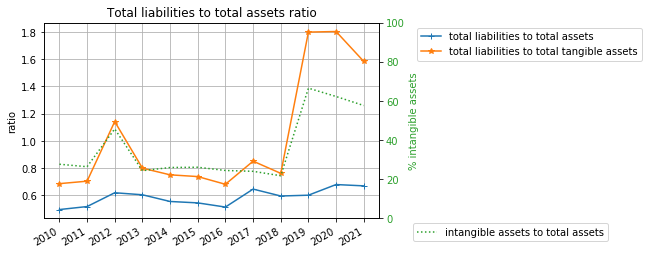

In [79]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('ratio')

# plot revenue as single bar
ax1.plot(year_ended_list,total_liabilities/total_assets, '-+',label='total liabilities to total assets')
ax1.plot(year_ended_list,total_liabilities/total_tangible_assets, '-*',label='total liabilities to total tangible assets')

ax1.tick_params(axis='y')
ax1.legend(bbox_to_anchor=(1.8, 1))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

#ax2.plot(year_ended_list,pcd,'+-g')
ax2.plot(year_ended_list,(total_assets-total_tangible_assets)/total_assets*100, ':',color=color,
    label='intangible assets to total assets')
    
ax2.set_ylabel('% intangible assets',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,100))
ax2.legend(bbox_to_anchor=(1.7, 0))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Total liabilities to total assets ratio')
plt.show()

For the years 2019 and 2020, the ratio of total liabilities to total tangible assets is greater than one at 1.8 on account of acquisitions. The value assigned to goodwill and intangibles is about \\$1 billion. The percentage of intangible assets to total assets is also plotted. The ratio indicates the company has taken on a lot of debt relative to assets and is something of concern. 60% of the total assets are intangible is of concern. 

#### Debt to equity and debt to NOP ratios

The debt-to-equity ratio (D/E) is another key characteristic Buffett considers carefully. Buffett prefers to see a small amount of debt so that earnings growth is being generated from shareholders' equity as opposed to borrowed money. The D/E ratio is calculated as follows:

$\text{Debt-to-Equity Ratio} = \frac {\text{Total Liabilities}} {\text{Shareholders' Equity}} \text{  OR  } \frac {\text{Long term debt}} {\text{Shareholders' Equity}}$

This ratio shows the proportion of equity and debt the company uses to finance its assets, and the higher the ratio, the more debt—rather than equity—is financing the company. A high debt level compared to equity can result in volatile earnings and large interest expenses. For a more stringent test, investors sometimes use only long-term debt instead of total liabilities in the calculation above.

D/E is the traditional way to look at a company's debt.  Some rules of thumb say that the D/E should not be above 2 or 3.  However the D/E company's typically vary by industry. The ratio of LT debt to NOP gives the number of years it would take the company to pay back debt from NOP, the lower the number the shorter amount of time.

$\text{Debt-to-NOP Ratio} = \frac {\text{Total Liabilities}} {\text{NOP}}$  

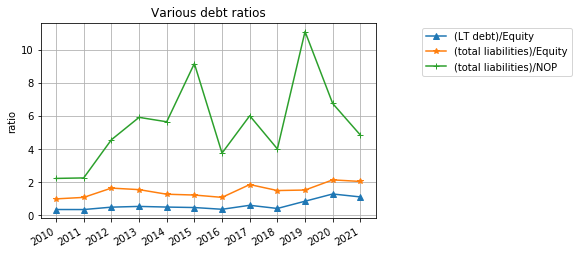

In [80]:
tangible_equity = total_tangible_assets - total_liabilities

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('ratio')

ax1.plot(year_ended_list,df_dcf_data['long_term_debt']/shareholder_equity, '-^',label='(LT debt)/Equity')
#ax1.plot(year_ended_list,df_dcf_data['long_term_debt']/tangible_equity, '-',label='(LT debt)/(Tangible Equity)')
ax1.plot(year_ended_list,total_liabilities/shareholder_equity, '-*',label='(total liabilities)/Equity')
#ax1.plot(year_ended_list,total_liabilities/BV, '-^',label='(total liabilities)/BV')
ax1.plot(year_ended_list,total_liabilities/nop, '-+',label='(total liabilities)/NOP')
#ax1.plot(year_ended_list,total_liabilities/net_income, '-+',label='(total liabilities)/(net income)')
#ax1.plot(year_ended_list,df_dcf_data['current_liabilities']/nop, '-*',label='(current liabilities)/NOP')
#ax1.plot(year_ended_list,Liabilities_wo_deposits/nop, '-+',label='(Liabilities w/o deposits)/NOP')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,10))
#ax1.legend()
ax1.legend(bbox_to_anchor=(1.6, 1))
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Various debt ratios')
plt.show()

(LT debt)/Equity is plotted and is below 2 for each year in the evaluation period. A threshold of 2 is traditionally the upper limit for a reasonable amount of debt that a company should carry.

(total liabilities)/Equity is plotted and except for 2020 has been below the threshold of 2.  

(total liabilities)/NOP to is plotted for each year in the evaluation period and except for 2019 is below 10.  A value of 10 has been chosen as the threshold for this ratio and indicates how many years it would take the company to pay off total liabilities from the NOP generated each year. A threshold of ten seems like a reasonable level of debt measured against NOP.

#### Financial ratios
Various ratios can be used to judge management performance. Consistent favorable trends are an indication that management is taking care of the company.

**Return on equity**  
Sometimes return on equity (RoE) is referred to as stockholder's return on investment. It reveals the rate at which shareholders earn income on their shares. Buffett always looks at RoE to see whether a company has consistently performed well compared to other companies in the same industry. RoE is calculated as follows:

$\text{Return on Equity} = \frac {\text{Net Income}} {\text{Shareholder's Equity}}$

Looking at the RoE in just the last year isn't enough. The investor should view the RoE from the past five to 10 years to analyze historical performance.

$\text{Shareholders’ Equity} = \text{Total Assets} − \text{Total Liabilities}$    

For this company, this method of getting Shareholders’ Equity gives negative values.  On the Consolidated Balance Sheets, there is a line for Total stockholders’ equity, which is used.

**Return on Assets**   
Return on assets is a profitability ratio that provides how much profit a company is able to generate from its assets. In other words, return on assets (RoA) measures how efficient a company's management is in generating earnings from their economic resources or assets on their balance sheet.

$\text{Return on assets} = \frac {\text{Net Income}} {\text{Total Assets}}$

Calculating the RoA of a company can be helpful in comparing a company's profitability over multiple quarters and years as well as comparing to similar companies. However, it's important to compare companies of similar size and industry.

For example, banks tend to have a large number of total assets on their books in the form of loans, cash, and investments. A large bank could easily have over \\$2 trillion in assets while putting up a net income that's similar to companies in other industries. Although the bank's net income or profit might be similar to an unrelated company and the bank might have high-quality assets, the bank's RoA will be lower. The larger number of total assets must be divided into the net income, creating a lower RoA for the bank.

Similarly, auto manufacturing requires huge facilities and specialized equipment. A lucrative software company that sells downloadable programs online may generate the same net profits, but it could have a significantly higher RoA than its more asset-heavy counterparts. When utilizing this metric to compare productivity across businesses, it's important to take into account what types of assets are required to function in a given industry, rather than simply comparing the figures.

**Profit Margin**  
A company's profitability depends not only on having a good profit margin, but also on consistently increasing it. This margin is calculated by dividing net income by net sales. For a good indication of historical profit margins, investors should look back at least five years. A high-profit margin indicates the company is executing its business well, but increasing margins mean management has been extremely efficient and successful at controlling expenses.

$\text{Profit Margin} = \frac {\text{Net Income}} {\text{Revenue}}$


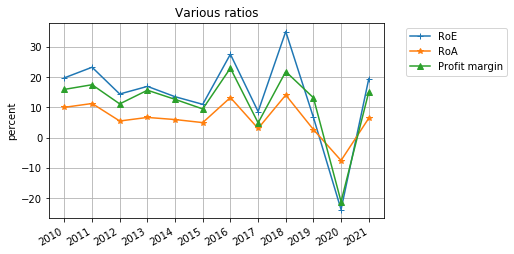

In [81]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('percent')

ax1.plot(year_ended_list,net_income/shareholder_equity*100, '-+',label='RoE')
ax1.plot(year_ended_list,net_income/total_assets*100, '-*',label='RoA')
#ax1.plot(year_ended_list,total_liabilities/shareholder_equity, '-^',label='D/E')
ax1.plot(year_ended_list,net_income/total_revenue*100, '-^',label='Profit margin')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,14))
#ax1.legend()
ax1.legend(bbox_to_anchor=(1.05, 1))
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Various ratios')
plt.show()

**Observation:**  
The trends for RoE, RoA and profit margin are shown above. The effect of the acquisition of Celgene has caused these ratios to go negative in 2020. From 2016 to 2019, these ratios had wide variation year to year, with 2017 showing a decline followed by a large increase the following year.  Normally steady performance is better than the erratic variation shown here.

### NAIC section 2: Evaluating management
See page 86, figure 9-1.  
- % pretax profit on sales, (net before taxes)/rev
- % earned on equity (another way of saying RoE, using calculated equity)

Percent earned on equity is a measure of financial performance calculated by dividing net income by equity. Because equity is equal to a company’s assets minus its debt, percent earned on equity is considered the return on net assets. Percent earned on equity is considered a gauge of a corporation's profitability and how efficient it is in generating profits.  

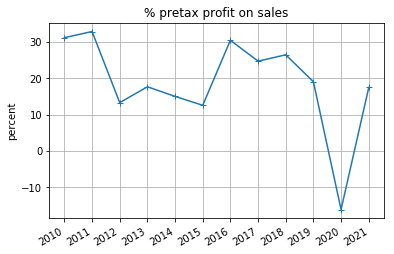

In [82]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('percent')
#ax1.plot(year_ended_list,net_income, '-+',label='net income')
ax1.plot(year_ended_list,df_dcf_data['income_before_income_taxes']/df_dcf_data['revenue']*100, '-+',
         label='income before taxes/rev')
#ax1.plot(year_ended_list,df_dcf_data['revenue'], '-+',label='revenue')
#ax1.plot(year_ended_list,free_cash_flow, '-*',label='free cash flow')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,18))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('% pretax profit on sales')
plt.show()

Over the years 2016 to 2020, pretax profit on sales has a downward trend. Ideally this trend should be increasing or at least flat.

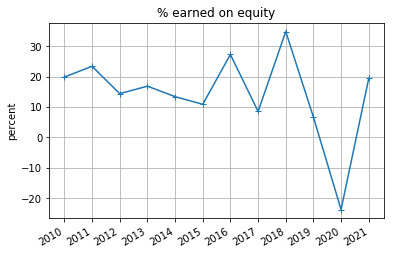

In [83]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('percent')

#ax1.plot(year_ended_list,shareholder_equity/df_dcf_data['revenue']*100, '-+k',
#        label='shareholder equity/rev')
#ax1.plot(year_ended_list,net_income/shareholder_equity*100, '-+',label='RoE')
ax1.plot(year_ended_list,net_income/(total_assets-total_liabilities)*100, '-+',label='RoE')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,12))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('% earned on equity')
plt.show()

Percent earned on equity (another way of saying RoE). Percent earned on equity trend has been flat up to 2015, then became erratic.

Percent earned on equity is a measure of financial performance calculated by dividing net income by equity. Because equity is equal to a company’s assets minus its debt, percent earned on equity is considered the return on net assets. Percent earned on equity is considered a gauge of a corporation's profitability and how efficient it is in generating profits.  

### Plot normalized data from consolidated statements
The following charts examine data from the consolidated financial statements and compare normalized trends over the evaluation period. The first chart plots normalized revenue along with normalized EPS, NOP and free cash flow.  All values are normalized to the starting value in the series. Change relative to the normalized starting value can be seen over the evaluation period. Ideally the normalized parameters plotted should track revenue. Any large departures indicate an area of concern. 

#### Normalized consolidated statement of income
The following chart shows normalized revenue plotted with normalized parameters from the consolidated statement of income.

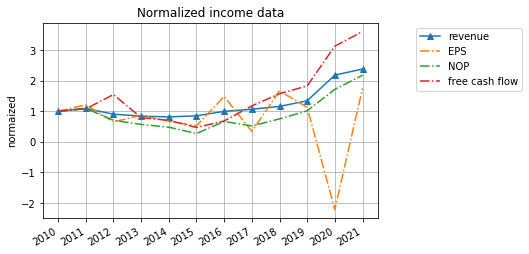

In [84]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

plt.plot(year_ended_list,revenue/revenue[0],'^-',label='revenue')
plt.plot(year_ended_list,EPS/EPS[0],'-.',label='EPS')
plt.plot(year_ended_list,nop/nop[0], '-.',label='NOP')
plt.plot(year_ended_list,free_cash_flow/free_cash_flow[0], '-.',label='free cash flow')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

#plt.ylim((0,3))
plt.title('Normalized income data')
plt.ylabel('normaized')
#plt.legend()
plt.legend(bbox_to_anchor=(1.1, 1))

plt.grid()

# space between the plots
#plt.tight_layout(4)

# show plot
plt.show()

The plot above shows a large departure of EPS in 2020 from the trends that were generally following revenue. In 2020 the company acquired Celgene which was the reason given for the negative EPS. Free cash flow and NOP did follow the revenue trend, with free cash flow increasing over revenue for the last four years. 

#### Normalized consolidated balance sheet
The following chart shows normalized revenue plotted with normalized parameters from the consolidated balance sheet.

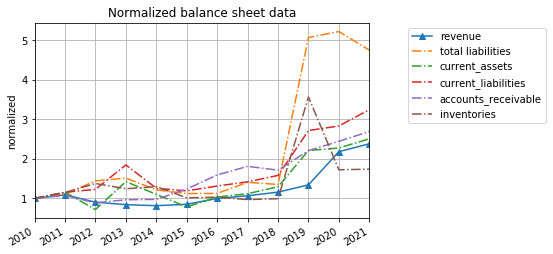

In [85]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

# set look back range, left_yr is the index into the date range
left_yr = 0 #look back to 1st year in the series

plt.plot(year_ended_list[left_yr:],revenue[left_yr:]/revenue[left_yr],'^-',label='revenue')
plt.plot(year_ended_list[left_yr:],
         total_liabilities[left_yr:]/total_liabilities[left_yr],
         '-.',label='total liabilities')
plt.plot(year_ended_list[left_yr:],
         df_dcf_data['current_assets'][left_yr:]/df_dcf_data['current_assets'].iloc[left_yr],
         '-.',label='current_assets')
plt.plot(year_ended_list[left_yr:],
         df_dcf_data['current_liabilities'][left_yr:]/df_dcf_data['current_liabilities'].iloc[left_yr],
         '-.',label='current_liabilities')
plt.plot(year_ended_list[left_yr:],
         df_dcf_data['accounts_receivable'][left_yr:]/df_dcf_data['accounts_receivable'].iloc[left_yr],
         '-.',label='accounts_receivable')
plt.plot(year_ended_list[left_yr:],
         df_dcf_data['inventories'][left_yr:]/df_dcf_data['inventories'].iloc[left_yr],
         '-.',label='inventories')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

plt.gcf().autofmt_xdate()

# Changes x-axis range
plt.gca().set_xbound(year_ended_list[left_yr], year_ended_list[-1])

#plt.ylim((0,4))
#plt.xlim([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])
plt.title('Normalized balance sheet data')
plt.ylabel('normalized')
#plt.legend()
plt.legend(bbox_to_anchor=(1.1, 1))
plt.grid()

# space between the plots
#plt.tight_layout(4)

# show plot
plt.show()

The plot above shows the divergence of several metrics from the revenue trend. Total and current liabilities are outpacing revenue from 2019. The acquisition of Celgene is given as the reason. This divergence is a concern.

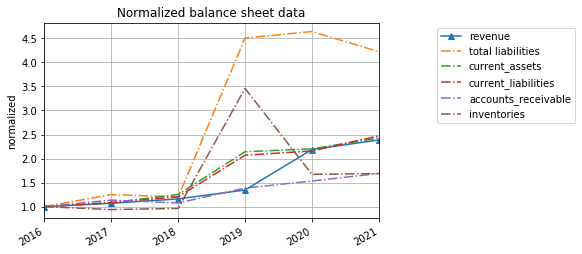

In [86]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

# set look back range, left_yr is the index into the date range
left_yr = -6

plt.plot(year_ended_list[left_yr:],
         revenue[left_yr:]/revenue[left_yr],'^-',label='revenue')
plt.plot(year_ended_list[left_yr:],
         total_liabilities[left_yr:]/total_liabilities[left_yr], '-.',label='total liabilities')
plt.plot(year_ended_list[left_yr:],
         df_dcf_data['current_assets'][left_yr:]/df_dcf_data['current_assets'].iloc[left_yr],
         '-.',label='current_assets')
plt.plot(year_ended_list[left_yr:],
         df_dcf_data['current_liabilities'][left_yr:]/df_dcf_data['current_liabilities'].iloc[left_yr],
         '-.',label='current_liabilities')
plt.plot(year_ended_list[left_yr:],
         df_dcf_data['accounts_receivable'][left_yr:]/df_dcf_data['accounts_receivable'].iloc[left_yr],
         '-.',label='accounts_receivable')
plt.plot(year_ended_list[left_yr:],
         df_dcf_data['inventories'][left_yr:]/df_dcf_data['inventories'].iloc[left_yr],
         '-.',label='inventories')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()
# Changes x-axis range
plt.gca().set_xbound(year_ended_list[left_yr], year_ended_list[-1])

#plt.ylim((0,4))
plt.title('Normalized balance sheet data')
plt.ylabel('normalized')
#plt.legend()
plt.legend(bbox_to_anchor=(1.6, 1))

plt.grid()

# space between the plots
#plt.tight_layout(4)

# show plot
plt.show()

Looking back over a six year period, total liabilities has diverged from revenue. 

### Market metrics <a id="section8-2"></a>
The share price is determined by the market. The value is determined by the analyst.

#### One dollar premise
This is a financial test that shows the strength of the business and how well management has rationality allocated to the company's business.

From a company's income, subtract all dividends paid to shareholders.  What is left over is the company's retained earnings.  Now add the company's retained earnings over a 10 year period.  Next determine the difference between the company's current market value and its market value 10 years ago.  If the business has employed retained earnings unproductively over this ten year period, the market eventually catches up and will set a lower price on the business. 

In [87]:
retained_earnings = net_income.sum() - dividends.sum()
print('retained earnings: ${:,.2f}B'.format(retained_earnings/1e9))

retained earnings: $-6.11B


Retained earnings are negative. This indicates either some bad data or something fundamentally wrong. 

Net income data is from the income statement under Net (Loss)/Earnings Attributable to BMY and Dividend data is from the cash flow sheet under financial activities. For this company,the net income for many years is less than the dividends paid, which results in negative retained earnings. I think this is an item of concern.  

In [88]:
# Current market value, share price multiplied by number of shares
cmv_high = df_dcf_data['shares_outstanding'].iloc[-1]*fy_high[-1]
cmv_low = df_dcf_data['shares_outstanding'].iloc[-1]*fy_low[-1]
print('Current market value: ${:,.2f}B to ${:,.2f}B'.format(cmv_low/1e9,cmv_high/1e9))

Current market value: $116.86B to $151.03B


In [89]:
# Past market value, share price multiplied by number of shares
pmv_high = df_dcf_data['shares_outstanding'].iloc[0]*fy_high[0]
pmv_low = df_dcf_data['shares_outstanding'].iloc[0]*fy_low[0]
print('Past market value: ${:,.0f}B to ${:,.0f}B'.format(pmv_low/1e9,pmv_high/1e9))

Past market value: $38B to $48B


In [90]:
print('Difference in market value: ${:,.0f}B to ${:,.0f}B'.format((cmv_low-pmv_low)/1e9,(cmv_high-pmv_high)/1e9))

Difference in market value: $78B to $103B


This difference in market value is greater than the retained earnings.

#### Share price vs EPS
Looking at the one dollar premise in terms of share price and EPS.  

The one dollar premise: one dollar of earning should translate into one dollar of market value - this seems the same as a plot of EPS versus share price.

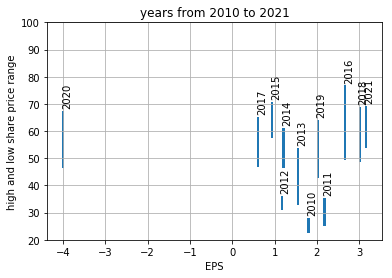

In [91]:
# plotting the eps data points
ax = plt.bar(EPS,fy_high-fy_low,width = .05,bottom=fy_low)
plt.grid()
plt.ylim((20,100))
plt.ylabel('high and low share price range')
plt.xlabel('EPS')
plt.title('years from 2010 to 2021')

rects = ax.patches

# Make some labels.
labels = [year_ended_list[i].strftime("%Y") for i in range(len(year_ended_list))]
for rect, label in zip(rects, labels):
    y_top =  rect.get_y() + rect.get_height()
    plt.text(rect.get_x(), y_top+1, label, rotation=90,va='bottom')    

plt.show()

**Observations:**   
The range in share price is roughly the same across the range of EPS. This means that investors are not valuing the company's EPS.

#### Market capitalization
Total value of common equity is calculated using the DCF model from scenario 1 inputs and it is a constant value for the year. The daily market capitalization is calculated from the formula:  

$\text{Market capitalization} = \text{(daily closing share price)} \times \text{(number of shares outstanding)}$  

Market capitalization refers to the total dollar market value of a company's outstanding shares of stock. It measures the cost of buying all of a company's shares. Comparing this value to the intrinsic value calculated from the DCF model shows whether the company can be purchased at a discount to its value.

In [92]:
#so = df_dcf_data['shares_outstanding'].iloc[-1] # shares outstanding
print('shares outstanding, basic: {:,.0f}'.format(so))

# get starting and ending dates for last calendar year in datetime format
start = year_ended_list[-1]
end = start + relativedelta(years=1)
p1 = df_price_history.truncate(before=start, after=end)

# print total value of common equity for base case and scenario
print('total value of common equity, baseline case: ${:,.2f}B'.format(tvce_baseline/1e9))
print('total value of common equity, scenario 1: ${:,.2f}B'.format(tvce_S1/1e9))
#print('average value of common equity (base & scenario): ${:,.2f}B'.format((tvce_S1+tvce_base)/2/1e9))

# make an array 
total_value_S1 = np.ones(len(p1))*tvce_S1 # the value is constant across all dates

# add scenario 1 total value of common equity data to dataframe
#p1['total value avg'] = total_value_avg
p1['total value S1'] = total_value_S1

shares outstanding, basic: 2,179,000,000
total value of common equity, baseline case: $1,137.70B
total value of common equity, scenario 1: $108.24B


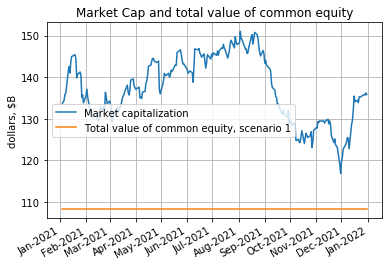

In [93]:
# Set the locator
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b-%Y')

plt.plot(p1['Close']*so/1e9,label='Market capitalization')
#plt.plot(p1['total value base']/1e9,label='total value of common equity, base')
plt.plot(p1['total value S1']/1e9,label='Total value of common equity, scenario 1')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

#plt.ylim((2,8))
plt.title('Market Cap and total value of common equity')
plt.ylabel('dollars, $B')
plt.legend()
plt.grid()

# show plot
plt.show()

As shown in the plot, the company's market capitalization is higher than the total value of common equity as calculated using scenario 1 DCF data. This implies that the company is overvalued. 

### Qualitative metrics <a id="section8-3"></a>
Beyond the numbers in the financial statements, there are metrics that are qualitative in nature that are important to the investor. These are subjective measures of business and management operations that influence value. In this section a few qualitative metrics are discussed below. 

- **Simple and understandable business model**  
BMY is a pharmaceutical company that manufactures drugs in several therapeutic areas. Although the science is not simple, the business framework of R&D, patent protection, manufacturing and distribution is typical of other manufacturing firms operating in the technology sector.   

- **Favorable long term prospects**  
The company has a long history and the recent trends are favorable, except for the acquisition in 2019, which upset the trends.  

- **Commodity reliance**  
By commodity is meant a product or service that is easily reproducible by a competitor. Pharmaceuticals are the result of R&D and protected by patents. The barrier to entry is high for Pharmaceutical companies.  

- **Consistent operating history**  
The trends for RoE, RoA and profit margin have been plotted above. The effect of the acquisition of Celgene has caused these ratios to go negative in 2020. From 2016 to 2019, these ratios had wide variation year to year, with 2017 showing a decline followed by a large increase the following year.  Normally steady performance is better than the erratic variation shown here. (LT debt)/Equity and (total liabilities)/Equity have been steady and below 2. (total liabilities)/NOP have been erratic over the evaluation period.   

- **Rationality**  
Do comments and discussion made by the management in the annual reports reflect an optimal level of benefit or utility to the company over the long term?  
 1. **Focus on core aspects**  
The company operates in one segment engaged in the discovery, development, licensing, manufacturing, marketing, distribution and sale of biopharmaceutical products on a global basis.   
 2. **Only invest in high ROE businesses**  
The principal strategy is to combine the resources, scale and capability of a pharmaceutical company with the speed and focus on innovation of the biotech industry. The acquisitions of Celgene in 2019 and MyoKardia in 2020 will further position us as a leading biopharmaceutical company, expanding our oncology, hematology, immunology and cardiovascular portfolios with several near-term assets and additional external partnerships.
 3. **Focus on shareholder equity**  
Adding value to the company  The priorities are to continue to renew and diversify our portfolio through launching our new product portfolio, advancing our early, mid and late-stage pipeline, and executing disciplined business development. They remain committed to reducing our debt and returning capital to shareholders.

Back to [**Contents**](#section0)  

## 9) Conclusion  <a id="section9"></a>
The following is a summary of the results described above:  
- Stock screener results: This company was selected from the Fidelity stock screener results. The company had increasing revenues and a dividend yield above 2.38%.
 - Current news: A few new articles were noted, nothing of significance found.
 - Review quarterly results: Not applicable since 10K was just released.
 - Average daily volume: Above 1M per day.
 - Dividend yield: Above 3%.
- Discounted cash flow analysis, baseline: The baseline DCF analysis yielded a very high ISV, driven primarily by revenue growth rate and low WACC.  The baseline ISV doesn't seem realistic.
- DCF Scenarios: Adjustments were made and the ISV is now below the current price.  
- NACI stock selection guide analysis: Share price has been trading in the 50 to 70 dollar range the last 7 years, indicating that the market is not impressed with the company. Average EPS (ignoring 2020) has been flat. Based on EPS growth, the estimated price range in 5 years is \\$8.99 to \\$12.19 per share. Based on NAIC's preferred method, the estimated price range in 5 years is \\$86.14 to \\$116.85 per share.
- Dividend payout: Dividend payout has been increasing over the years. The dividend yield for the past five years has been in the 2.5 to 3.5 percent range.
Dividend pay ratios for the last 3 years are near or below 50%. Dividend cash flow IRR is 8.01%.
- Management performance:  
 - Financial metrics: The value assigned to goodwill and intangibles is about \\$1 billion. The ratio indicates the company has taken on a lot of debt relative to assets and is something of concern. Various debt ratios seem OK. Except for 2020 performance ratios and trends are acceptable. The divergence of total liabilities from revenue is of concern.
 - Market metrics: The range in share price is roughly the same across the range of EPS. This means that investors are not valuing the company's EPS. The company's market capitalization is higher than the total value of common equity as calculated using scenario 1 DCF data. This implies that the company is overvalued. 
 - Qualitative metrics: see above

Concerns: increasing total liabilities, low ISV, negative retained earnings, 60% of the total assets are intangible.

Summary: The analysis presented in this report is based on the company’s fundamentals and tries to establish the value of the company. This strategy is essentially value investing where companies are chosen that meet a set of criteria and who's stock price is below the intrinsic value plus a margin of safety. These investments are usually held for the long term. Company revenue, earnings, debt and dividends were examined. Adjustments were made to the DCF and the ISV is below the current price. The share price has been trading in the 50 to 70 dollar range the last 7 years, indicating that the market is not impressed with the company. The dividend payout has been increasing over the years and the dividend cash flow IRR is 8.01%. The value assigned to goodwill and intangibles is about $1 billion. The ratio indicates the company has taken on a lot of debt relative to assets. The divergence of total liabilities from revenue is of concern. Negative retained earnings is a concern.

Recommendation: Don’t buy above $50 per share.

## 10) Notes  <a id="section10"></a>
The following notes outline the changes to the DCF model for financial and REIT companies.  

**Valuing a REIT**  
Notes from Valuepro Book, page 237  

- NOPM: To calculate operating income take rental revenue and subtracted total real estate expenses and G&A expenses. To arrive at the NOPM divide the adjusted income from real estate by real estate rental revenue. For the REIT, take income from real estate, which includes depreciation and amortization, and subtract GSA. Exclude other income, gains on sale of real estate and interest expenses.
- REIT has no traditional R&D costs

REIT is not taxed at the corporate level, tax rate: should be near zero.

Depreciation and capital expenditures are significantly higher for REITs than in other companies.

New property acquisitions are not directly accounted for in the DCF model for a REIT.

- Working capitol: accounts payable, rents and security deposits
 - Short term assets: cash, rents and other receivables and prepaid expenses
 - Short term liabilities: accounts payable, advance rents security deposits
 
Working capital is almost zero, which is similar to other financial companies.

The consolidated balance sheet lists the assets as: 
- Real estate held for investment, at cost:
 - Land
 - Buildings and improvements
 - Total real estate held for investment, at cost
 - Less accumulated depreciation and amortization
 - Real estate held for investment, net
- Real estate and lease intangibles held for sale, net
- Cash and cash equivalents <- current asset
- Accounts receivable, net <- current asset
- Lease intangible assets, net
- Other assets, net

The line items indicated above have been taken to be the current assets. Intangibles and long term items have been excluded.

The consolidated balance sheet lists the liabilities as: 
- Distributions payable <- current liabilities
- Accounts payable and accrued expenses <- current liabilities
- Lease intangible liabilities, net
- Other liabilities
- Line of credit payable and commercial paper <- current liabilities
- Term loans, net
- Mortgages payable, net <- current liabilities
- Notes payable, net

The line items indicated above have been taken to be the current liabilities.

**Valuing a financial company**  
Notes from Valuepro Book, page 206  

- Total revenue comes from the total interest and dividend income line on the income statement.  The calculation of operating income is more inclusive for a financial company than for an industrial or high tech company.  For financial companies, operating revenue includes all normal revenue items plus interest income, dividends received and other investment income.

- Cost of Goods Sold (CGS) comes from the Total interest expense line on the statement of income. 
- General and Administrative (G&A) are set to zero since they are included in the interest expense line
- A financial company has no traditional R&D costs

- $\text{Cost of Goods Sold (CGS)} = \text{Total interest expense} + \text{Total non-interest expense}$  
- General and Administrative (G&A) are set to zero since they are included in the interest expense line
- A financial company has no traditional R&D costs

- Depreciation and amortization of premises and equipment from Consolidated Statements of Cash Flows.  
- Amortization of other acquisition-related intangible assets is not included.

- New investment and Depreciation: Property, plant and equipment expenditures and depreciation charges are significantly lower for a financial company.  A typical manufacturing company, in order to grow its business, invests a significant portion of its revenues in plant, property and equipment (PPE).  Financial companies invest very little in the way of PPE.  However, software, risk management systems and acquisitions of other businesses, need to be included.

From the Consolidated Statements of Cash Flows, under Cash Flows from Investing Activities
- Purchases of premises and equipment
- Purchases of leased equipment, net

- Working capital supports manufacturing and service activities of nonfinancial companies.  For financial companies, their principal liabilities  and assets are financial claims that take the place of working capital.  Because there is no differentiation between current and long term assets and liabilities for a financial company, we adjust working capital charges to zero.  A financial company generally invests all of its funds in other financial assets, which have characteristics of current assets rather than PP&E.  
$\text{Accounts Receivable} = 0$  
$\text{Inventories} = 0$  
$\text{Accounts Payable} = 0$  
$\text{working capital} = 0$ 

- Short term assets:  The balance sheets of most financial companies do not separate assets and liabilities into current and long term categories.  When calculating the short term assets take the total assets and subtract goodwill and intangible assets also subtract other assets of questionable value.  Subtract long term assets such as PP&E from total assets.  

$\text{Short term assets} = \text{Total assets} - \text{good will and others of questionable value} - \text{Premises and equipment}$

- A financial company's principal liabilities are deposits, Federal funds purchased, trading account liabilities, insurance policy and claims reserves, contract holder funds and short term borrowing.  To be consistent with the treatment of interest and an operating expense for financial companies, include long term debt in the short term liability category.  
- Short term liabilities:  Include long term debt.  

$\text{Long term debt} = 0$

**Excess return period**  
The excess return period is based on a judgment call.  The authors of [2] use the 1-5-7-10 rule. They group companies into one of four general categories and excess return periods.  They use a 10 year excess return period to calculate what they would consider the maximum value. They use a more conservative 1 year, 5 year or 7 year return period to calculate a more reasonable or minimum value.  
- 1 year: Boring companies that operate in a highly competitive, low margin industry in which they have nothing particular going for them.  
- 5 year: Decent companies that have a recognizable name and decent reputation and perhaps a regulatory benefit (utility company), but can’t control pricing or growth.  
- 7 year: Good companies with good brand names, large companies of scale, good marketing channels and consumer identification (e.g. McDonald’s)  
- 10 year: Great companies with great growth potential, tremendous marketing power, band names and in-place benefits (e.g. Intel, Microsoft, Coca Cola, Disney)  

**Notes about negative working capital**  
The company has a negative working capital rate. Negative working capital describes a situation where a company's current liabilities exceed its current assets as stated on the firm's balance sheet. In other words, there is more short-term debt than there are short-term assets. 

Negative working capital most often arises when a business generates cash very quickly because it can sell products to its customers before it has to pay the bills to its vendors for the original goods or raw materials. In this way, the company is effectively using the vendor's money to grow. 

**Dividend Aristocrat, Achiever & Champion**  
This company was selected for analysis because it is on the Dividend Aristocrat list and passes the quick look tests.  This notebook will be used as a template when analyzing other companies.

- Aristocrat: S&P 500 Dividend Aristocrats is designed to measure the performance of S&P 500 index constituents that have followed a policy of consistently increasing dividends every year for at least 25 consecutive years.
- Achiever: The Broad Dividend Achievers Index. Eligible companies must be incorporated in the U.S. or its territories, trade on the NYSE, NASDAQ or AMEX, and have increased its annual regular dividend payments for the last 10 or more consecutive years.
 - https://dividendvaluebuilder.com/dividend-achievers-list/
 - https://www.marketbeat.com/dividends/achievers/
- Champion: This list includes companies that had increased their dividend for at least 25 consecutive years, and includes additional companies that had paid higher dividends without having increased the payout in every calendar year.
 - https://dividendvaluebuilder.com/dividend-champions-list/
 - https://www.dividendgrowthinvestor.com/p/dividend-champions-list.html

## 11) References  <a id="section11"></a>

1. Gray, Gary, et al. Streetsmart Guide to Valuing a Stock: the Savvy Investors Key to Beating the Market. McGraw-Hill, 2004.
2. O'Hara, Thomas E., and Ken Janke. Starting and Running a Profitable Investment Club: the Official Guide from the National Association of Investors Corporation. Times Business, 1998. 
3. Robert G. Hagstrom, The Warren Buffett Way, Wiley, 2013